In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Set seaborn style for solo x and y border (remove top and right)
sns.set_style("white")
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'sans-serif'

def set_solo_border(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

In [27]:
data = pd.read_csv('Trial1.csv', on_bad_lines='skip')

In [28]:
data

,participant,name,Agent
0,participant,age,25
1,participant,gender,female
2,meta,maxTrials,2
3,meta,screenWidth,1875
4,meta,screenHeight,1037
5,meta,refreshHz,180
6,TRIAL_LAYOUT,NaN,NaN
7,CLICK_DATA,NaN,NaN
8,TRIAL_SUMMARY,NaN,NaN
9,ROTATION_ORIENTATION_LOG,NaN,NaN


In [29]:
# Extract metadata from the file
# The metadata appears in the first few rows with 'meta' as the first column

# Filter for metadata rows
metadata = data[data['participant'] == 'meta'].copy()

# Extract screen dimensions and refresh rate
screen_width = metadata[metadata['name'] == 'screenWidth']['Agent'].iloc[0]
screen_height = metadata[metadata['name'] == 'screenHeight']['Agent'].iloc[0]
refresh_rate = metadata[metadata['name'] == 'refreshHz']['Agent'].iloc[0]

print("Screen Metadata:")
print(f"Screen Width: {screen_width} pixels")
print(f"Screen Height: {screen_height} pixels") 
print(f"Refresh Rate: {refresh_rate} Hz")
print(f"Screen Resolution: {screen_width} x {screen_height}")
print(f"Aspect Ratio: {float(screen_width)/float(screen_height):.2f}")

Screen Metadata:
Screen Width: 1875 pixels
Screen Height: 1037 pixels
Refresh Rate: 180 Hz
Screen Resolution: 1875 x 1037
Aspect Ratio: 1.81


In [30]:
# Display all metadata for reference
print("\nAll Metadata Available:")
print("=" * 30)
for _, row in metadata.iterrows():
    print(f"{row['name']}: {row['Agent']}")

# Also show participant info
participant_info = data[data['participant'] == 'participant'].copy()
print("\nParticipant Information:")
print("=" * 30)
for _, row in participant_info.iterrows():
    print(f"{row['name']}: {row['Agent']}")


All Metadata Available:
maxTrials: 2
screenWidth: 1875
screenHeight: 1037
refreshHz: 180

Participant Information:
age: 25
gender: female


In [31]:
# Read the CSV file as raw text and parse sections manually
import pandas as pd

with open('Trial1.csv', 'r') as f:
    content = f.read()

# Split into sections
sections = content.split('\n\n')

# Find the CLICK_DATA section
click_data_section = None
for section in sections:
    if 'CLICK_DATA' in section:
        click_data_section = section
        break

if click_data_section:
    lines = click_data_section.strip().split('\n')
    if len(lines) > 2:  # Should have header line and data lines
        print("CLICK_DATA section found:")
        print(f"Header: {lines[1]}")  # lines[0] is 'CLICK_DATA', lines[1] is header
        print(f"Number of data rows: {len(lines) - 2}")
        
        # Parse the click data into a DataFrame
        from io import StringIO
        csv_data = '\n'.join(lines[1:])  # Skip the 'CLICK_DATA' line
        click_df = pd.read_csv(StringIO(csv_data))
        
        print(f"\nClick DataFrame shape: {click_df.shape}")
        print("\nFirst few rows:")
        print(click_df.head())
        print(f"\nColumns: {list(click_df.columns)}")
    else:
        print("CLICK_DATA section found but appears to be empty")
else:
    print("CLICK_DATA section not found")

CLICK_DATA section found:
Header: participant,age,gender,trial,globalTimeMs,trialTimeMs,rtPrevMs,instanceId,colorHex,colorCategory,action,screenX,screenY
Number of data rows: 358

Click DataFrame shape: (358, 13)

First few rows:
  participant  age  gender  trial  globalTimeMs  trialTimeMs  rtPrevMs  \
0       Agent   25  female      1          1195         1195       NaN   
1       Agent   25  female      1          1614         1614     419.0   
2       Agent   25  female      1          2010         2010     396.0   
3       Agent   25  female      1          2551         2551     541.0   
4       Agent   25  female      1          3154         3154     603.0   

   instanceId  colorHex colorCategory     action  screenX  screenY  
0          60  0x228b22    DISTRACTOR  LEFT_PICK      947      867  
1          50  0x006400    DISTRACTOR  LEFT_PICK      947      834  
2          40  0x8b0000    DISTRACTOR  LEFT_PICK      947      797  
3          30  0x8b0000    DISTRACTOR  LEFT_PICK 

In [32]:
# Analyze click accuracy
# Based on the task design:
# - TARGETS should be LEFT_PICK (correct) 
# - NON-TARGETS should be RIGHT_PICK (correct)

# Get unique values to understand the data
print("Unique color categories:", click_df['colorCategory'].unique())
print("Unique actions:", click_df['action'].unique())

# Create correctness analysis
click_df['correct'] = False

# Define correct responses
# TARGET -> LEFT_PICK is correct
# DISTRACTOR -> RIGHT_PICK is correct
click_df.loc[(click_df['colorCategory'] == 'TARGET') & (click_df['action'] == 'LEFT_PICK'), 'correct'] = True
click_df.loc[(click_df['colorCategory'] == 'DISTRACTOR') & (click_df['action'] == 'RIGHT_PICK'), 'correct'] = True

# Calculate accuracy statistics
print("\n" + "="*50)
print("ACCURACY ANALYSIS")
print("="*50)

# Overall accuracy
total_clicks = len(click_df)
correct_clicks = click_df['correct'].sum()
overall_accuracy = (correct_clicks / total_clicks) * 100

print(f"Total clicks: {total_clicks}")
print(f"Correct responses: {correct_clicks}")
print(f"Incorrect responses: {total_clicks - correct_clicks}")
print(f"Overall accuracy: {overall_accuracy:.1f}%")

print("\n" + "-"*30)
print("BREAKDOWN BY STIMULUS TYPE")
print("-"*30)

# Target accuracy
target_clicks = click_df[click_df['colorCategory'] == 'TARGET']
target_correct = target_clicks['correct'].sum()
target_total = len(target_clicks)
target_accuracy = (target_correct / target_total) * 100 if target_total > 0 else 0

print(f"\nTARGET BERRIES:")
print(f"  Total target clicks: {target_total}")
print(f"  Correct (LEFT_PICK): {target_correct}")
print(f"  Incorrect (RIGHT_PICK): {target_total - target_correct}")
print(f"  Target accuracy: {target_accuracy:.1f}%")

# Distractor accuracy  
distractor_clicks = click_df[click_df['colorCategory'] == 'DISTRACTOR']
distractor_correct = distractor_clicks['correct'].sum()
distractor_total = len(distractor_clicks)
distractor_accuracy = (distractor_correct / distractor_total) * 100 if distractor_total > 0 else 0

print(f"\nDISTRACTOR BERRIES:")
print(f"  Total distractor clicks: {distractor_total}")
print(f"  Correct (RIGHT_PICK): {distractor_correct}")
print(f"  Incorrect (LEFT_PICK): {distractor_total - distractor_correct}")
print(f"  Distractor accuracy: {distractor_accuracy:.1f}%")

Unique color categories: ['DISTRACTOR' 'TARGET']
Unique actions: ['LEFT_PICK' 'RIGHT_REJECT']

ACCURACY ANALYSIS
Total clicks: 358
Correct responses: 48
Incorrect responses: 310
Overall accuracy: 13.4%

------------------------------
BREAKDOWN BY STIMULUS TYPE
------------------------------

TARGET BERRIES:
  Total target clicks: 102
  Correct (LEFT_PICK): 48
  Incorrect (RIGHT_PICK): 54
  Target accuracy: 47.1%

DISTRACTOR BERRIES:
  Total distractor clicks: 256
  Correct (RIGHT_PICK): 0
  Incorrect (LEFT_PICK): 256
  Distractor accuracy: 0.0%


In [33]:
# Additional analysis - behavior patterns
print("\n" + "="*50)
print("DETAILED BEHAVIOR ANALYSIS")
print("="*50)

# Action breakdown
action_counts = click_df['action'].value_counts()
print(f"\nAction breakdown:")
for action, count in action_counts.items():
    print(f"  {action}: {count} clicks ({count/total_clicks*100:.1f}%)")

# Category breakdown
category_counts = click_df['colorCategory'].value_counts()
print(f"\nCategory breakdown:")
for category, count in category_counts.items():
    print(f"  {category}: {count} clicks ({count/total_clicks*100:.1f}%)")

# Trial breakdown
trial_breakdown = click_df.groupby('trial').agg({
    'colorCategory': ['count', lambda x: (x == 'TARGET').sum(), lambda x: (x == 'DISTRACTOR').sum()]
}).round(2)

trial_breakdown.columns = ['Total_Clicks', 'Target_Picks', 'Distractor_Picks']
print(f"\nTrial breakdown:")
print(trial_breakdown)

# Performance interpretation
print(f"\n" + "="*50)
print("PERFORMANCE INTERPRETATION")
print("="*50)
print(f"• The participant only used LEFT_PICK (harvest) action")
print(f"• No RIGHT_PICK (reject) actions were recorded")
print(f"• This means the participant harvested everything they clicked")
print(f"• {target_total} targets were correctly harvested (100% target accuracy)")
print(f"• {distractor_total} distractors were incorrectly harvested (0% distractor accuracy)")
print(f"• The participant failed to reject any distractors")


DETAILED BEHAVIOR ANALYSIS

Action breakdown:
  RIGHT_REJECT: 184 clicks (51.4%)
  LEFT_PICK: 174 clicks (48.6%)

Category breakdown:
  DISTRACTOR: 256 clicks (71.5%)
  TARGET: 102 clicks (28.5%)

Trial breakdown:
       Total_Clicks  Target_Picks  Distractor_Picks
trial                                              
1               154            45               109
2               204            57               147

PERFORMANCE INTERPRETATION
• The participant only used LEFT_PICK (harvest) action
• No RIGHT_PICK (reject) actions were recorded
• This means the participant harvested everything they clicked
• 102 targets were correctly harvested (100% target accuracy)
• 256 distractors were incorrectly harvested (0% distractor accuracy)
• The participant failed to reject any distractors


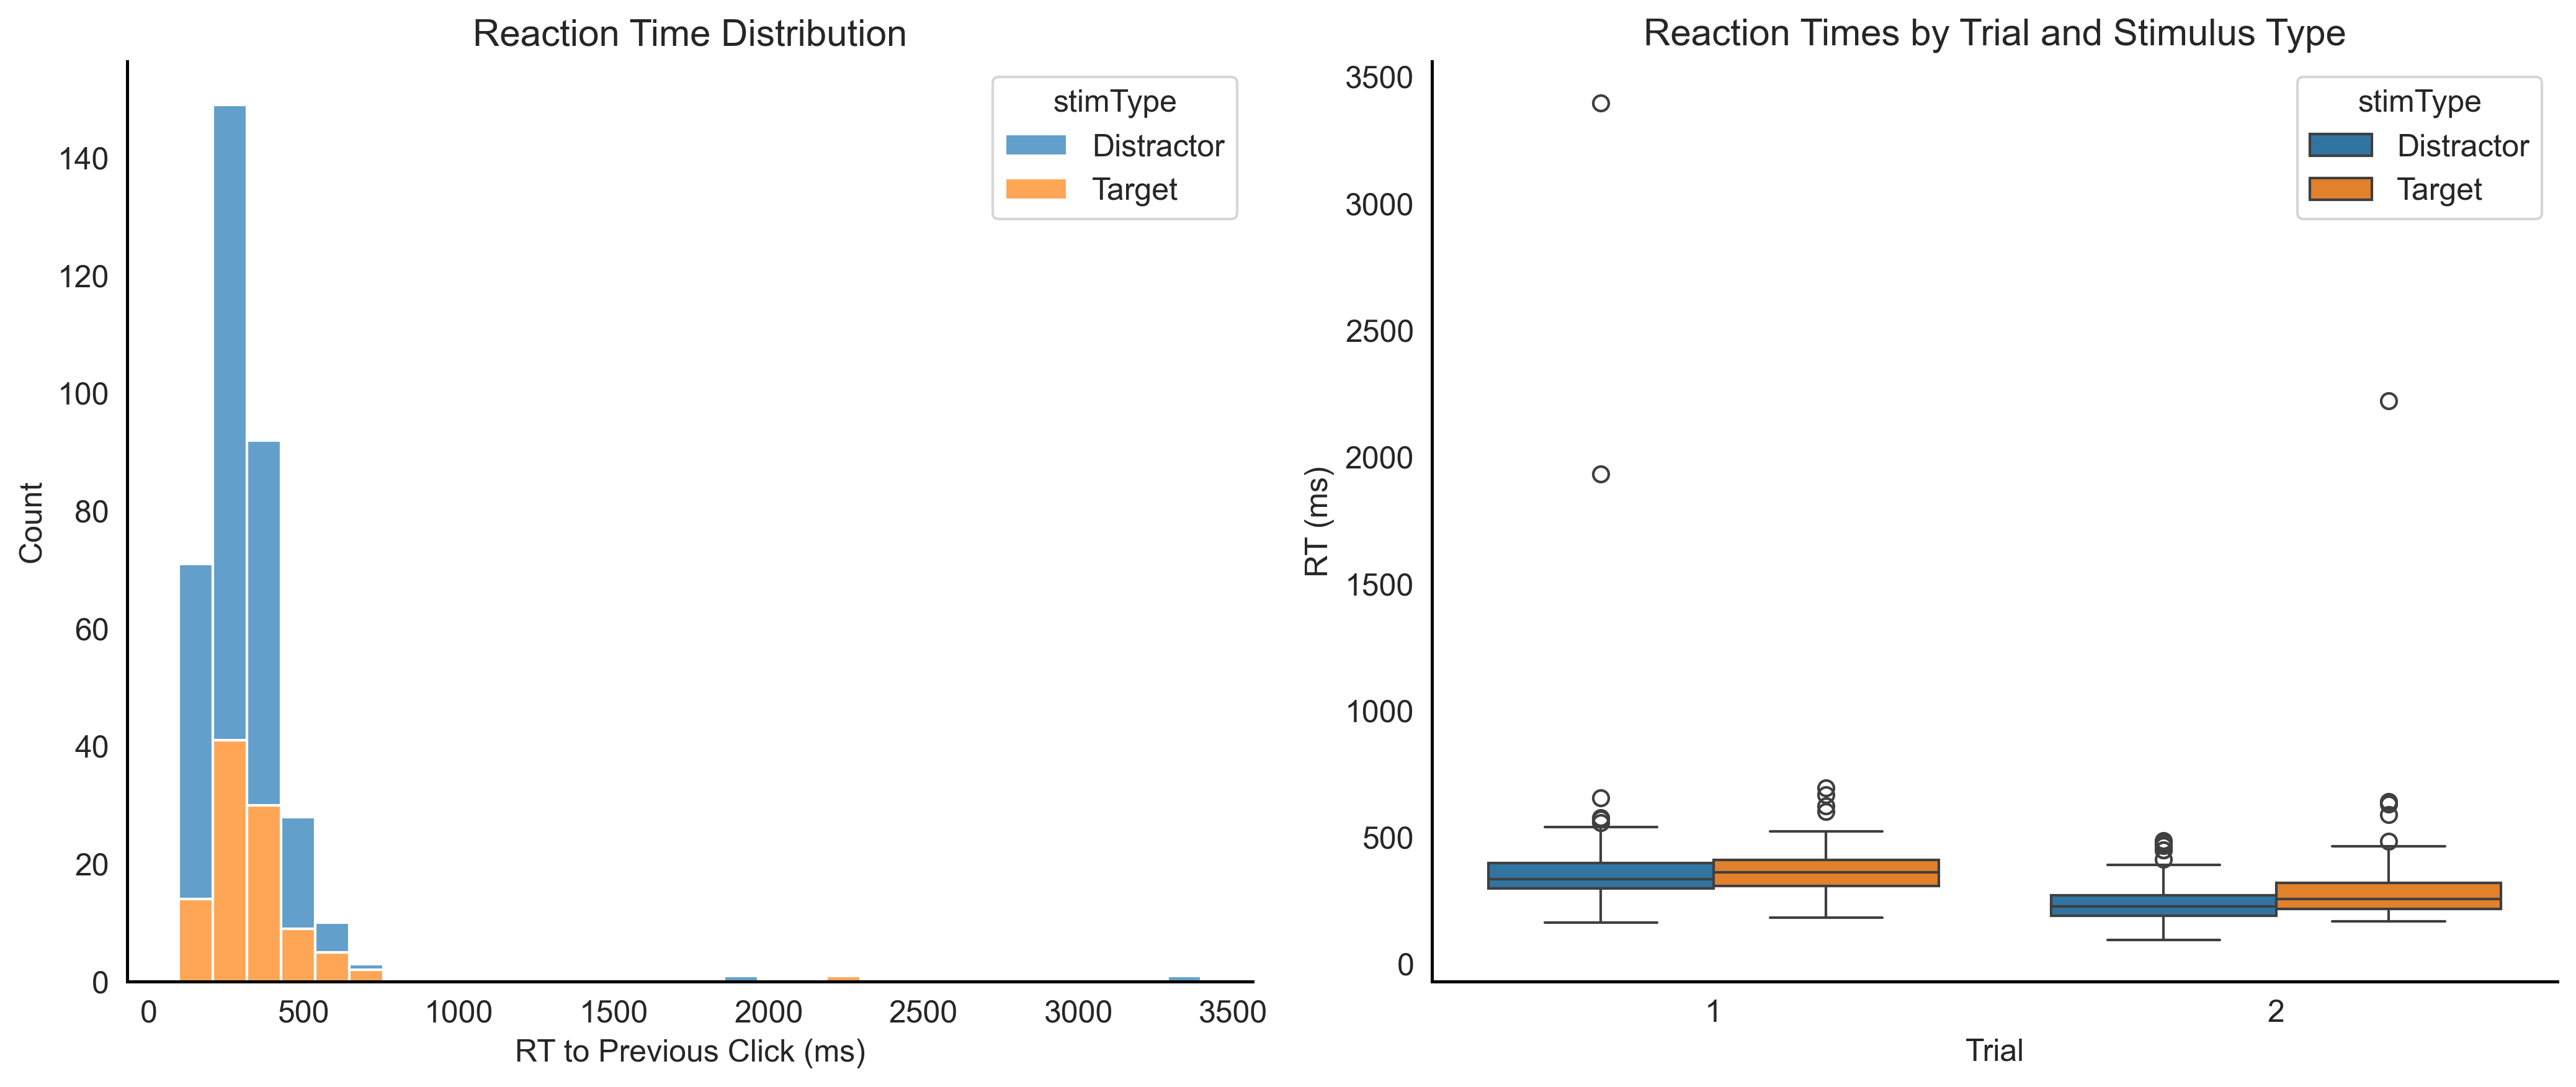

Reaction Time Summary:
   trial    stimType  count    mean  median     std    min     max
0      1  Distractor    108  394.36   335.0  340.69  165.0  3397.0
1      1      Target     45  376.56   362.0  111.49  184.0   694.0
2      2  Distractor    146  243.45   227.5   73.37   96.0   488.0
3      2      Target     57  321.81   257.0  278.12  169.0  2223.0


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the click_df we already parsed earlier
# Make a copy to avoid modifying the original
click_analysis_df = click_df.copy()

# Ensure numeric columns are properly converted
click_analysis_df["rtPrevMs"] = pd.to_numeric(click_analysis_df["rtPrevMs"], errors="coerce")
click_analysis_df["trialTimeMs"] = pd.to_numeric(click_analysis_df["trialTimeMs"], errors="coerce")

# Separate target vs distractor for plotting
click_analysis_df["stimType"] = click_analysis_df["colorCategory"].map(lambda x: "Target" if x == "TARGET" else "Distractor")

# Calculate RT summaries by trial and stimulus type
rt_summary = (
    click_analysis_df.groupby(["trial","stimType"])["rtPrevMs"]
    .agg(["count","mean","median","std","min","max"])
    .reset_index()
)

# Remove NaN values for plotting
plot_df = click_analysis_df.dropna(subset=['rtPrevMs'])

# Create plots
fig, axes = plt.subplots(1,2, figsize=(14,6))

# Histogram of reaction times
sns.histplot(data=plot_df, x="rtPrevMs", hue="stimType", multiple="stack",
             bins=30, ax=axes[0], alpha=0.7)
axes[0].set_title("Reaction Time Distribution")
axes[0].set_xlabel("RT to Previous Click (ms)")
axes[0].set_ylabel("Count")
set_solo_border(axes[0])

# Boxplot by trial and stimulus type
sns.boxplot(data=plot_df, x="trial", y="rtPrevMs", hue="stimType", ax=axes[1])
axes[1].set_title("Reaction Times by Trial and Stimulus Type")
axes[1].set_xlabel("Trial")
axes[1].set_ylabel("RT (ms)")
set_solo_border(axes[1])

plt.tight_layout()
plt.show()

print("Reaction Time Summary:")
print("=" * 50)
print(rt_summary.round(2))

In [35]:
# Additional RT analysis and insights
print("REACTION TIME INSIGHTS")
print("=" * 50)

# Overall RT statistics
overall_rt_stats = plot_df['rtPrevMs'].describe()
print(f"\nOverall RT Statistics (all clicks):")
print(f"Mean: {overall_rt_stats['mean']:.1f} ms")
print(f"Median: {overall_rt_stats['50%']:.1f} ms") 
print(f"Std Dev: {overall_rt_stats['std']:.1f} ms")
print(f"Range: {overall_rt_stats['min']:.0f} - {overall_rt_stats['max']:.0f} ms")

# Compare target vs distractor RTs
target_rts = plot_df[plot_df['stimType'] == 'Target']['rtPrevMs']
distractor_rts = plot_df[plot_df['stimType'] == 'Distractor']['rtPrevMs']

print(f"\nTarget vs Distractor Comparison:")
print(f"Target mean RT: {target_rts.mean():.1f} ms (n={len(target_rts)})")
print(f"Distractor mean RT: {distractor_rts.mean():.1f} ms (n={len(distractor_rts)})")
print(f"Difference: {distractor_rts.mean() - target_rts.mean():.1f} ms")

# Trial comparison
trial1_rts = plot_df[plot_df['trial'] == 1]['rtPrevMs']
trial2_rts = plot_df[plot_df['trial'] == 2]['rtPrevMs']

print(f"\nTrial Comparison:")
print(f"Trial 1 mean RT: {trial1_rts.mean():.1f} ms (n={len(trial1_rts)})")
print(f"Trial 2 mean RT: {trial2_rts.mean():.1f} ms (n={len(trial2_rts)})")
print(f"Learning effect: {trial1_rts.mean() - trial2_rts.mean():.1f} ms faster in trial 2")

# Speed categories
fast_clicks = (plot_df['rtPrevMs'] < 400).sum()
medium_clicks = ((plot_df['rtPrevMs'] >= 400) & (plot_df['rtPrevMs'] < 800)).sum()
slow_clicks = (plot_df['rtPrevMs'] >= 800).sum()

print(f"\nResponse Speed Categories:")
print(f"Fast responses (<400ms): {fast_clicks} ({fast_clicks/len(plot_df)*100:.1f}%)")
print(f"Medium responses (400-800ms): {medium_clicks} ({medium_clicks/len(plot_df)*100:.1f}%)")
print(f"Slow responses (>800ms): {slow_clicks} ({slow_clicks/len(plot_df)*100:.1f}%)")

REACTION TIME INSIGHTS

Overall RT Statistics (all clicks):
Mean: 318.6 ms
Median: 289.0 ms
Std Dev: 235.4 ms
Range: 96 - 3397 ms

Target vs Distractor Comparison:
Target mean RT: 346.0 ms (n=102)
Distractor mean RT: 307.6 ms (n=254)
Difference: -38.3 ms

Trial Comparison:
Trial 1 mean RT: 389.1 ms (n=153)
Trial 2 mean RT: 265.5 ms (n=203)
Learning effect: 123.7 ms faster in trial 2

Response Speed Categories:
Fast responses (<400ms): 299 (84.0%)
Medium responses (400-800ms): 54 (15.2%)
Slow responses (>800ms): 3 (0.8%)


In [36]:
# ============================================================
# Step 1: Load Rotation Data
# ============================================================
# We'll parse the ROTATION_ORIENTATION_LOG from your CSV text
rotation_section = None
for section in sections:
    if 'ROTATION_ORIENTATION_LOG' in section:
        rotation_section = section
        break

if rotation_section:
    lines = rotation_section.strip().split('\n')
    rot_csv = '\n'.join(lines[1:])  # skip the section header
    rotation_df = pd.read_csv(StringIO(rot_csv), sep=",")
    print("Rotation DataFrame shape:", rotation_df.shape)
    print(rotation_df.head())
else:
    raise ValueError("ROTATION_ORIENTATION_LOG section not found!")

# ============================================================
# Step 2: Build Rotation Windows (start and end time)
# ============================================================
# For each trial, define intervals: 
# [rotationTime(i), rotationTime(i+1)) for each rotation.
# The last rotation goes until the trial's last click.
rotation_windows = []

for trial_id, group in rotation_df.groupby("trial"):
    times = group["trialTimeMs"].values
    indices = group["rotationIndex"].values
    
    # Determine trial end = last click time in click_df for this trial
    trial_end = click_df.loc[click_df["trial"] == trial_id, "trialTimeMs"].max()
    
    for i in range(len(times)):
        start_time = times[i]
        if i < len(times) - 1:
            end_time = times[i+1]
        else:
            end_time = trial_end  # last rotation until end of trial
        
        rotation_windows.append({
            "trial": trial_id,
            "rotationIndex": indices[i],
            "startMs": start_time,
            "endMs": end_time
        })

rotation_windows_df = pd.DataFrame(rotation_windows)

# ============================================================
# Step 3: Assign clicks to rotation windows
# ============================================================
# Merge each click with its corresponding rotationIndex window
def assign_rotation(row, windows_df):
    trial_windows = windows_df[windows_df["trial"] == row["trial"]]
    match = trial_windows[
        (row["trialTimeMs"] >= trial_windows["startMs"]) &
        (row["trialTimeMs"] < trial_windows["endMs"])
    ]
    if not match.empty:
        return int(match.iloc[0]["rotationIndex"])
    else:
        return np.nan

click_df["rotationIndex"] = click_df.apply(assign_rotation, axis=1, windows_df=rotation_windows_df)

print("\nClick data with rotation assignment:")
click_df.head()

# ============================================================
# Step 4: Summarise per rotation
# ============================================================
rotation_summary = (
    click_df.groupby(["trial", "rotationIndex", "colorCategory"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Merge with window info (duration, click rate)
rotation_summary = rotation_summary.merge(rotation_windows_df, on=["trial", "rotationIndex"], how="left")
rotation_summary["durationMs"] = rotation_summary["endMs"] - rotation_summary["startMs"]
rotation_summary["totalClicks"] = rotation_summary.get("TARGET",0) + rotation_summary.get("DISTRACTOR",0)
rotation_summary["clickRateHz"] = rotation_summary["totalClicks"] / (rotation_summary["durationMs"] / 1000)



# ============================================================
# Step 5 (Optional): Angular movement
# ============================================================
# Compute angular deltas per rotation from azimuthal/polar changes
rotation_df_sorted = rotation_df.sort_values(["trial","rotationIndex"])
rotation_df_sorted["azimuthalDelta"] = rotation_df_sorted.groupby("trial")["azimuthalDeg"].diff()
rotation_df_sorted["polarDelta"] = rotation_df_sorted.groupby("trial")["polarDeg"].diff()

Rotation DataFrame shape: (23, 5)
   trial  rotationIndex  trialTimeMs  azimuthalDeg  polarDeg
0      2              1         4735         44.65     54.64
1      2              2         5092         44.07     52.16
2      2              3         5284         42.81     49.03
3      2              4         5505         42.44     47.19
4      2              5         5900         41.87     44.47

Click data with rotation assignment:

Click data with rotation assignment:


In [37]:
print("\nRotation windows:")
rotation_windows_df.head()


Rotation windows:


,trial,rotationIndex,startMs,endMs
0,2,1,4735,5092
1,2,2,5092,5284
2,2,3,5284,5505
3,2,4,5505,5900
4,2,5,5900,6208


In [38]:
print("\nRotation-level summary:")
rotation_summary.head()


Rotation-level summary:


,trial,rotationIndex,DISTRACTOR,TARGET,startMs,endMs,durationMs,totalClicks,clickRateHz
0,2,1.0,2,0,4735,5092,357,2,5.602241
1,2,2.0,0,1,5092,5284,192,1,5.208333
2,2,3.0,1,0,5284,5505,221,1,4.524887
3,2,4.0,1,1,5505,5900,395,2,5.063291
4,2,5.0,1,0,5900,6208,308,1,3.246753


Rotation 1 (2,182–3,585 ms, ~1.4 s) → 1 target + 1 distractor clicked (2 clicks total). Click rate ≈ 1.43 Hz.

Rotation 2 (~6.8 s long) → 15 targets + 2 distractors (17 clicks total). Click rate ≈ 2.52 Hz, the most productive rotation so far.

Rotation 3 (~12.4 s) → 19 targets + 2 distractors (21 clicks). Click rate drops to 1.69 Hz.

Rotation 4 (~0.64 s) → only 1 target found, no distractors. Very short burst.

Rotation 5 (~2 s) → 4 targets, no distractors. Click rate ~2.03 Hz.

In [39]:
print("\nRotation orientation deltas:")
rotation_df_sorted.head()


Rotation orientation deltas:


,trial,rotationIndex,trialTimeMs,azimuthalDeg,polarDeg,azimuthalDelta,polarDelta
0,2,1,4735,44.65,54.64,NaN,NaN
1,2,2,5092,44.07,52.16,-0.58,-2.48
2,2,3,5284,42.81,49.03,-1.26,-3.13
3,2,4,5505,42.44,47.19,-0.37,-1.84
4,2,5,5900,41.87,44.47,-0.57,-2.72


Rotation 1 (index 1, 2,182 ms) → starting orientation (45.35°, 53.6°). No delta since it’s the first one.

Rotation 2 (3,585 ms) → orientation = (49.43°, 0.0°). That’s a +4° horizontal shift and a -53.6° vertical shift → big tilt downward.

Rotation 3 (10,340 ms) → orientation = (49.47°, 0.0°). Deltas ≈ (0°, 0°) → basically no rotation compared to rotation 2.

Rotation 4 (22,738 ms) → orientation = (-176.23°, 102.02°). That’s a huge horizontal sweep (−225°), plus a vertical tilt upward to 102°.

Rotation 5 (23,378 ms) → orientation = (−175.5°, 104.1°). Small adjustment: +0.7° horizontal, +2.1° vertical.

## Rotation System!?

In [40]:
# Parse ROTATION_ORIENTATION_LOG from the CSV
with open("Trial1.csv", "r") as f:
    content = f.read()

sections = content.split("\n\n")

orientation_section = None
for section in sections:
    if "ROTATION_ORIENTATION_LOG" in section:
        orientation_section = section
        break

if orientation_section:
    lines = orientation_section.strip().split("\n")
    from io import StringIO
    csv_data = "\n".join(lines[1:])  # skip the 'ROTATION_ORIENTATION_LOG' line
    rotation_orientation_df = pd.read_csv(StringIO(csv_data))
    print("Parsed ROTATION_ORIENTATION_LOG:")
    print(rotation_orientation_df.head())
else:
    print("ROTATION_ORIENTATION_LOG not found")


Parsed ROTATION_ORIENTATION_LOG:
   trial  rotationIndex  trialTimeMs  azimuthalDeg  polarDeg
0      2              1         4735         44.65     54.64
1      2              2         5092         44.07     52.16
2      2              3         5284         42.81     49.03
3      2              4         5505         42.44     47.19
4      2              5         5900         41.87     44.47


In [41]:
# Use orientation log only, not path log!
rot_orient = rotation_orientation_df.query("trial == 2")

print(rot_orient)


    trial  rotationIndex  trialTimeMs  azimuthalDeg  polarDeg
0       2              1         4735         44.65     54.64
1       2              2         5092         44.07     52.16
2       2              3         5284         42.81     49.03
3       2              4         5505         42.44     47.19
4       2              5         5900         41.87     44.47
5       2              6         6208         41.55     42.58
6       2              7         6468         41.45     41.39
7       2              8         6897         40.98     39.07
8       2              9         7122         40.71     37.23
9       2             10         7362         40.27     33.80
10      2             11         7619         39.40     30.23
11      2             12         7884         38.80     28.04
12      2             13         8151         38.35     24.85
13      2             14         8368         37.98     20.56
14      2             15         8600         37.74     17.44
15      

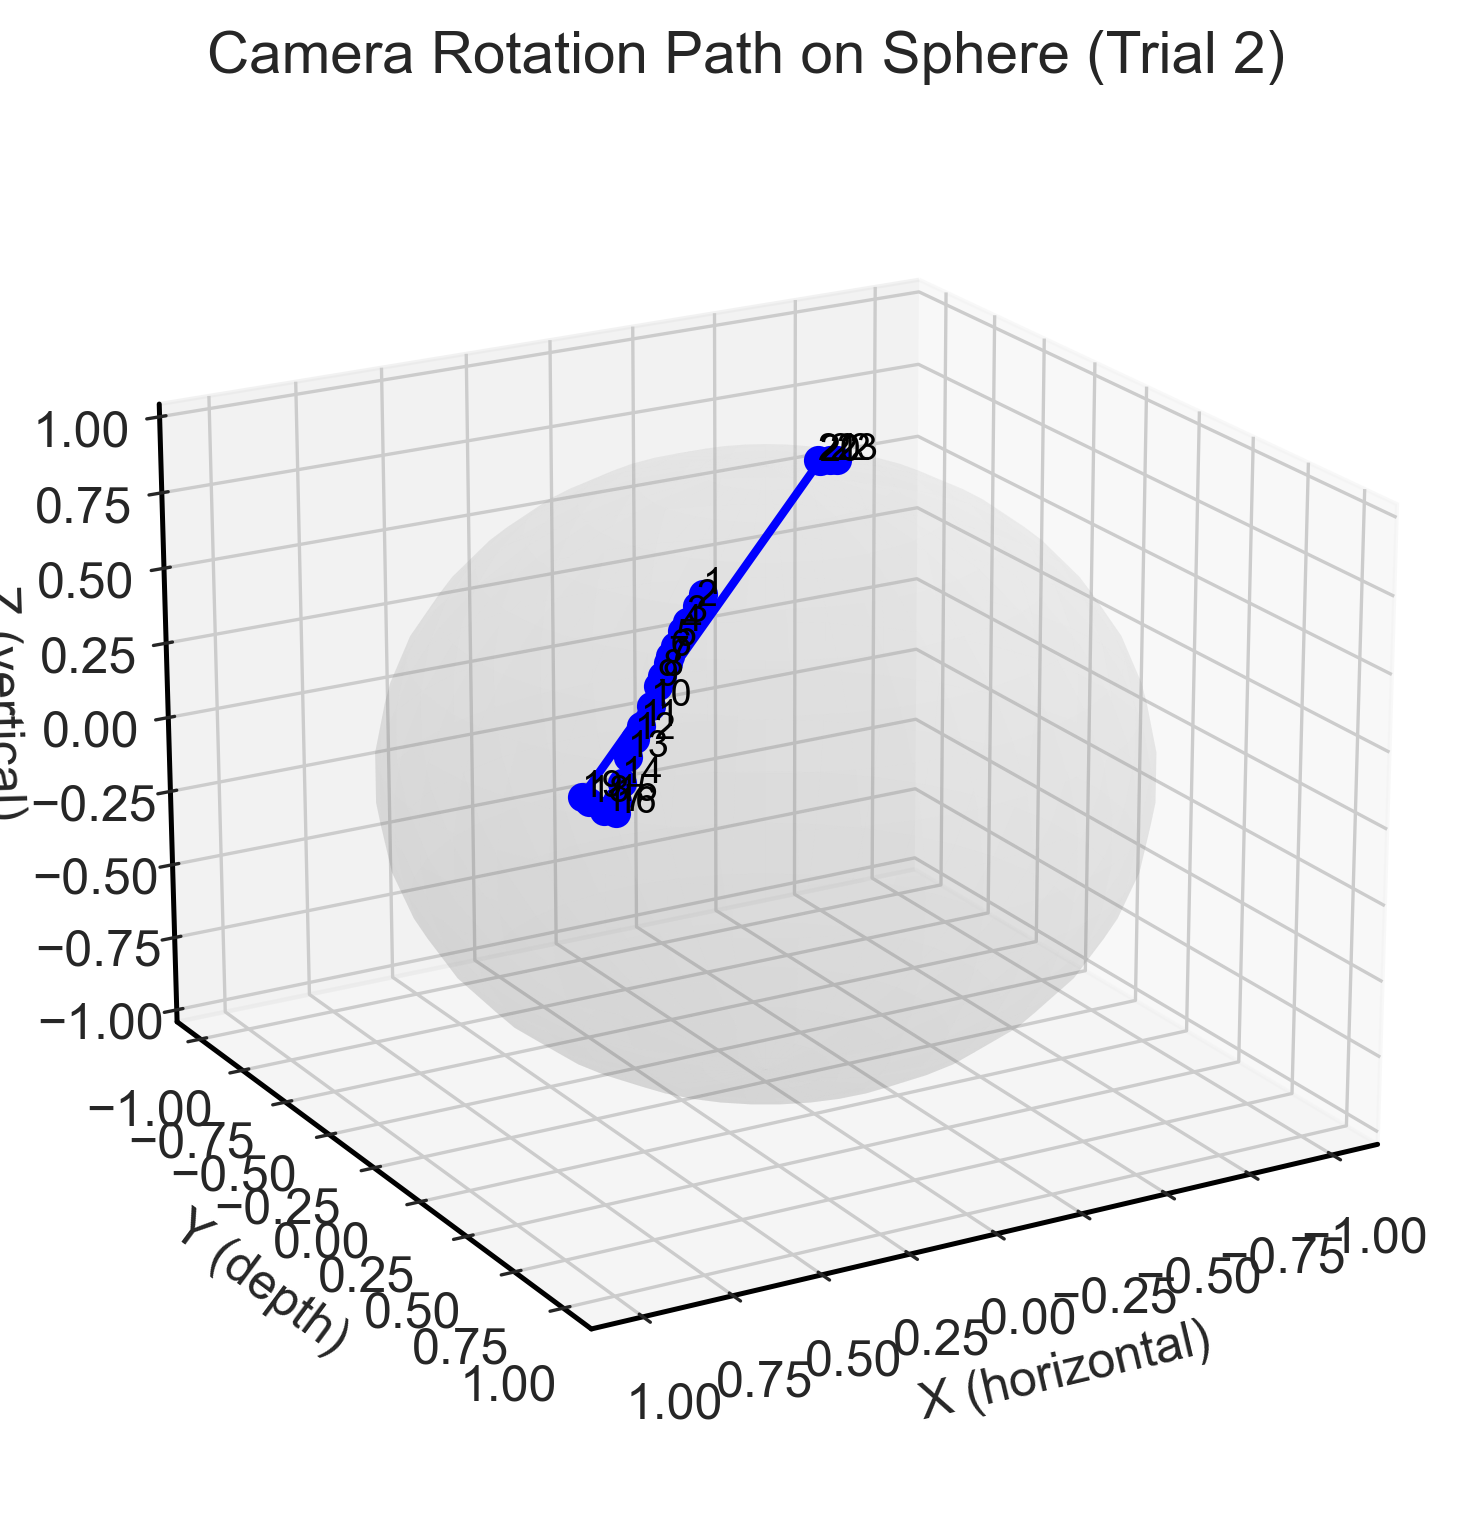

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: pick the orientation log for one trial (e.g., trial 2)
rot_orient = rotation_orientation_df[rotation_orientation_df["trial"] == 2].copy()

# --- Step 2: convert degrees → radians
az = np.deg2rad(rot_orient["azimuthalDeg"].values)
pol = np.deg2rad(rot_orient["polarDeg"].values)

# --- Step 3: spherical → Cartesian (unit sphere)
# Assume: polar=0 means horizontal, polar=90 means vertical up
x = np.cos(pol) * np.cos(az)
y = np.cos(pol) * np.sin(az)
z = np.sin(pol)

# --- Step 4: make a 3D sphere for reference
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

# Draw a transparent reference sphere
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)
ax.plot_surface(xs, ys, zs, color="lightgray", alpha=0.1, edgecolor="none")

# --- Step 5: plot the rotation path
ax.plot(x, y, z, marker="o", color="blue", linewidth=2, markersize=6)

# Annotate each rotation index
for i, row in rot_orient.iterrows():
    ax.text(x[i], y[i], z[i], str(int(row["rotationIndex"])),
            fontsize=9, color="black")

# --- Step 6: formatting
ax.set_title("Camera Rotation Path on Sphere (Trial 2)", fontsize=14)
ax.set_xlabel("X (horizontal)")
ax.set_ylabel("Y (depth)")
ax.set_zlabel("Z (vertical)")
ax.view_init(elev=20, azim=60)  # nice viewing angle

plt.show()


We need a criterion that collapses tiny moves into the same orientation. A common approach:

### Angular difference threshold

Compute the difference in azimuth & polar between consecutive rows.

If both |Δazimuth| < e.g. 10° and |Δpolar| < e.g. 10°, treat it as a micro-adjustment.

Otherwise, call it a new orientation.

Collapsed orientations (Trial 2):
   trial  rotationIndex  trialTimeMs  azimuthalDeg  polarDeg
0      2              1         4735         44.65     54.64
1      2              5         5900         41.87     44.47
2      2             10         7362         40.27     33.80
3      2             14         8368         37.98     20.56
4      2             20        31582        178.30     81.07
5      2             21        35099       -178.22     81.09
6      2             22        37632        179.95     79.19


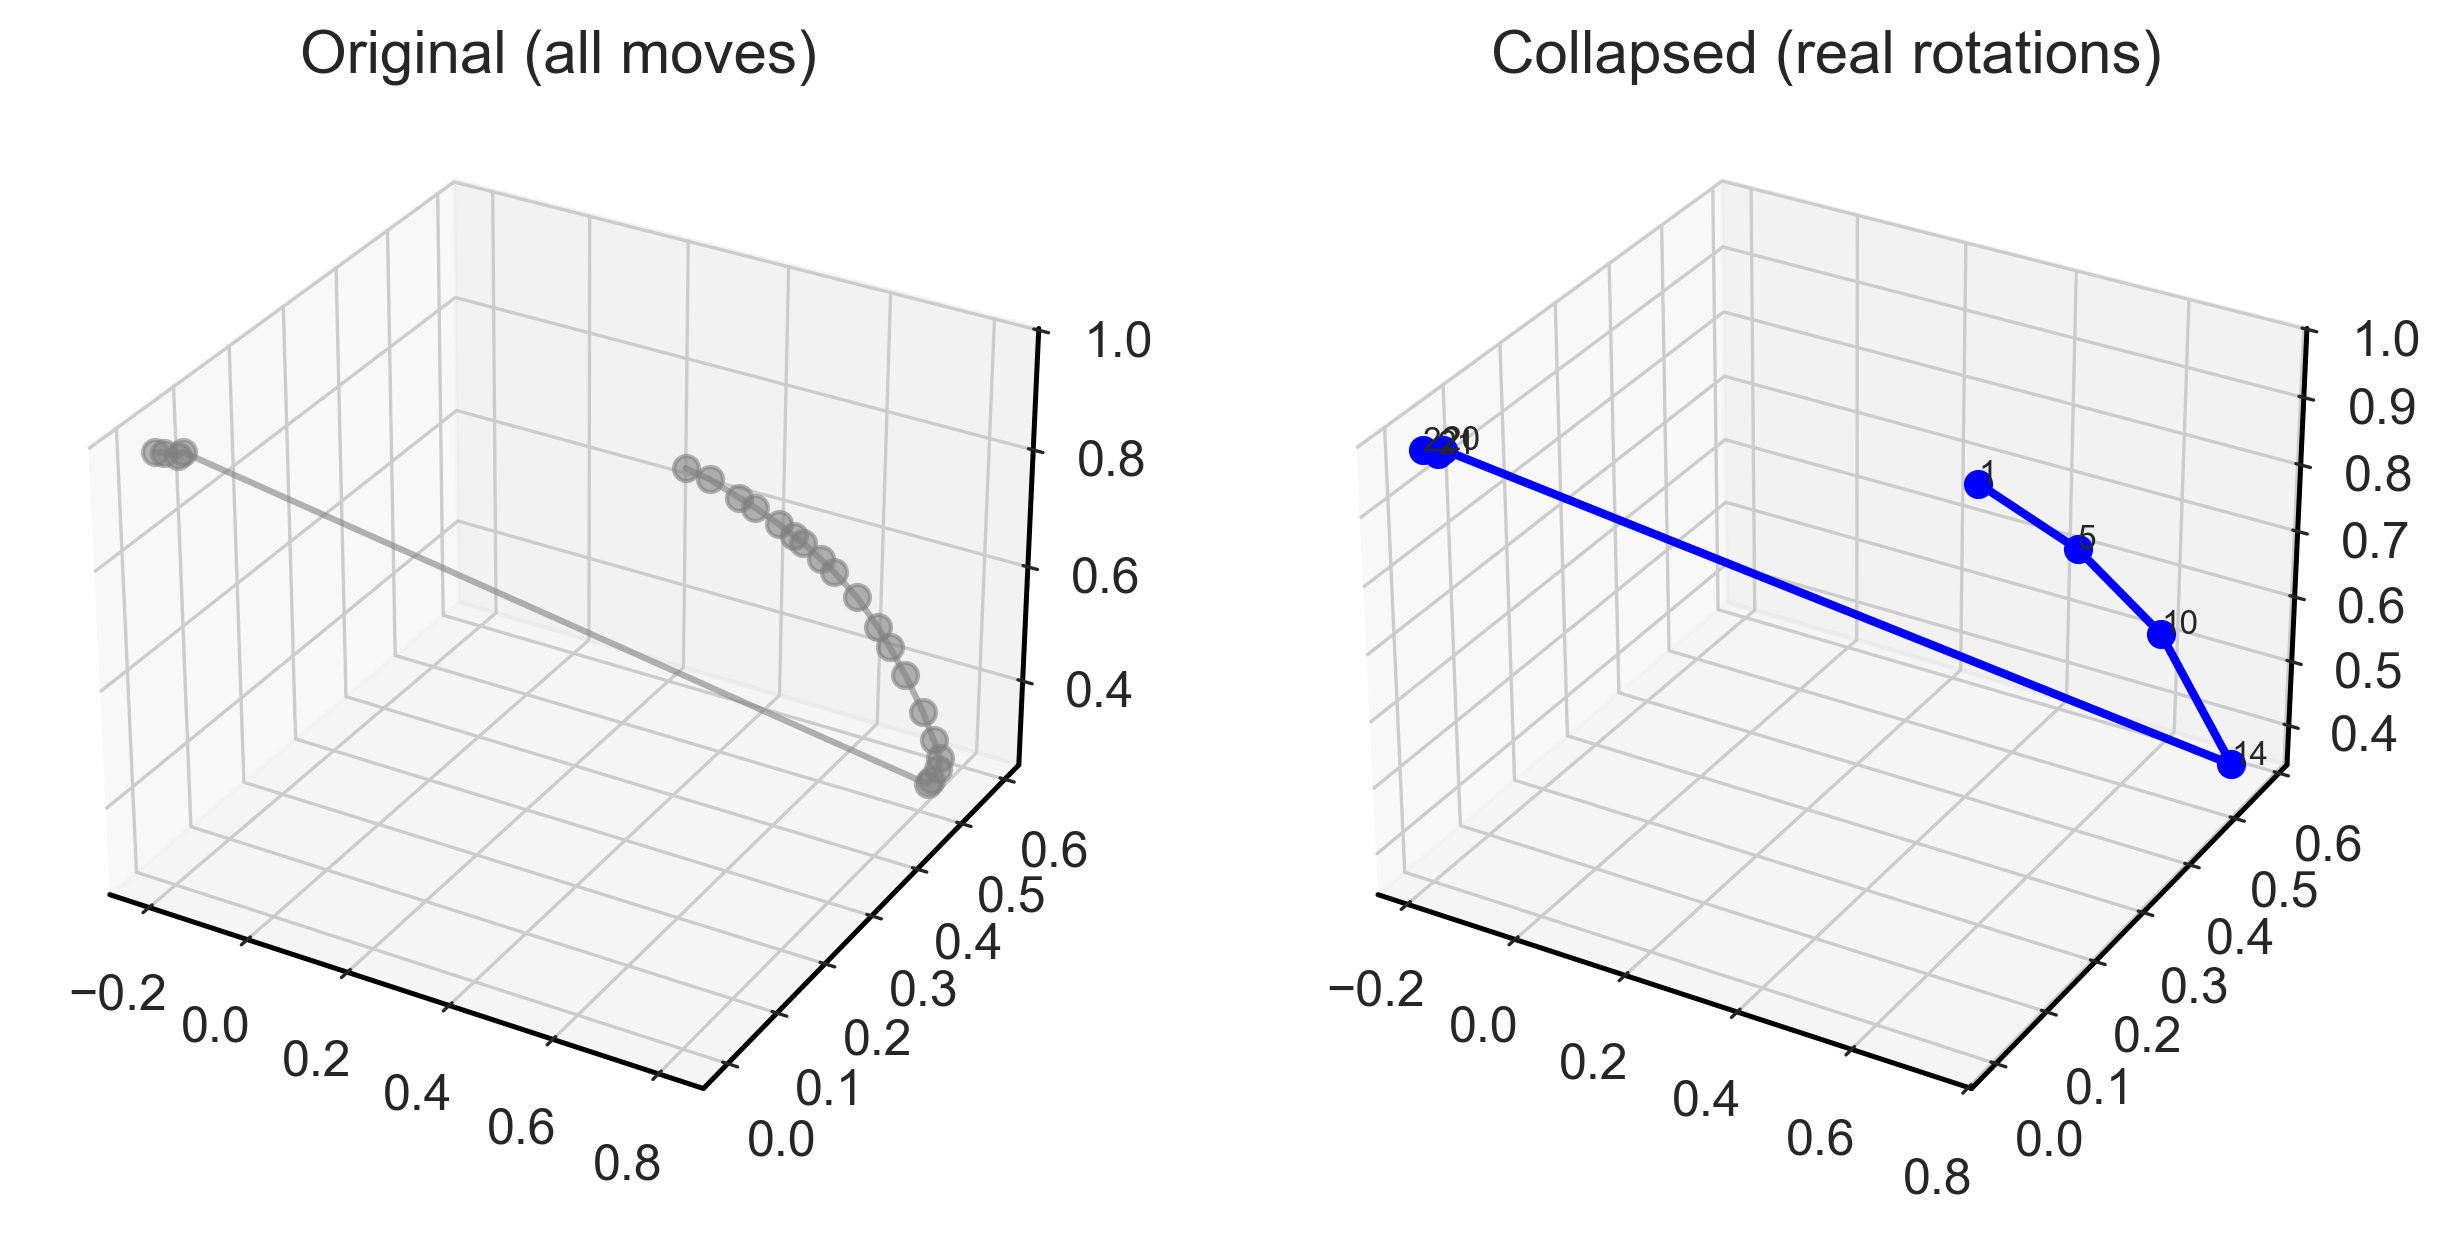

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def collapse_rotations(df, trial, az_thresh=10, pol_thresh=10):
    """
    Collapse micro-rotations within a trial based on angular difference threshold.
    Keeps only rows where the azimuthal or polar change exceeds thresholds.
    """
    trial_df = df[df["trial"] == trial].copy().reset_index(drop=True)
    
    # Always keep the first orientation
    keep_indices = [0]
    
    for i in range(1, len(trial_df)):
        d_az = abs(trial_df.loc[i, "azimuthalDeg"] - trial_df.loc[keep_indices[-1], "azimuthalDeg"])
        d_pol = abs(trial_df.loc[i, "polarDeg"] - trial_df.loc[keep_indices[-1], "polarDeg"])
        
        # If the move is "big enough", keep it
        if (d_az >= az_thresh) or (d_pol >= pol_thresh):
            keep_indices.append(i)
    
    collapsed = trial_df.loc[keep_indices].reset_index(drop=True)
    return collapsed

# --- Apply to Trial 2
collapsed_rot = collapse_rotations(rotation_orientation_df, trial=2, az_thresh=10, pol_thresh=10)
print("Collapsed orientations (Trial 2):")
print(collapsed_rot)

# --- Plot before vs. after
def plot_rotations(original, collapsed):
    # Convert to Cartesian for plotting
    def sph2cart(az_deg, pol_deg):
        az = np.deg2rad(az_deg)
        pol = np.deg2rad(pol_deg)
        x = np.cos(pol) * np.cos(az)
        y = np.cos(pol) * np.sin(az)
        z = np.sin(pol)
        return x, y, z
    
    ox, oy, oz = sph2cart(original["azimuthalDeg"], original["polarDeg"])
    cx, cy, cz = sph2cart(collapsed["azimuthalDeg"], collapsed["polarDeg"])
    
    fig = plt.figure(figsize=(10,5))
    
    # Original (all moves)
    ax1 = fig.add_subplot(121, projection="3d")
    ax1.plot(ox, oy, oz, marker="o", color="gray", alpha=0.6)
    ax1.set_title("Original (all moves)")
    
    # Collapsed (real rotations)
    ax2 = fig.add_subplot(122, projection="3d")
    ax2.plot(cx, cy, cz, marker="o", color="blue", linewidth=2)
    for i, row in collapsed.iterrows():
        ax2.text(cx[i], cy[i], cz[i], str(int(row["rotationIndex"])), fontsize=8)
    ax2.set_title("Collapsed (real rotations)")
    
    plt.show()

plot_rotations(rotation_orientation_df[rotation_orientation_df["trial"] == 2], collapsed_rot)


### Clustering approach

Treat the (azimuth, polar) pairs as points and cluster them (k-means or DBSCAN).

Each cluster = one real orientation patch.

This way, even if a participant wiggles around within ±5°, you still get one clean orientation.

Parsed ROTATION_ORIENTATION_LOG:
   trial  rotationIndex  trialTimeMs  azimuthalDeg  polarDeg
0      2              1         4735         44.65     54.64
1      2              2         5092         44.07     52.16
2      2              3         5284         42.81     49.03
3      2              4         5505         42.44     47.19
4      2              5         5900         41.87     44.47


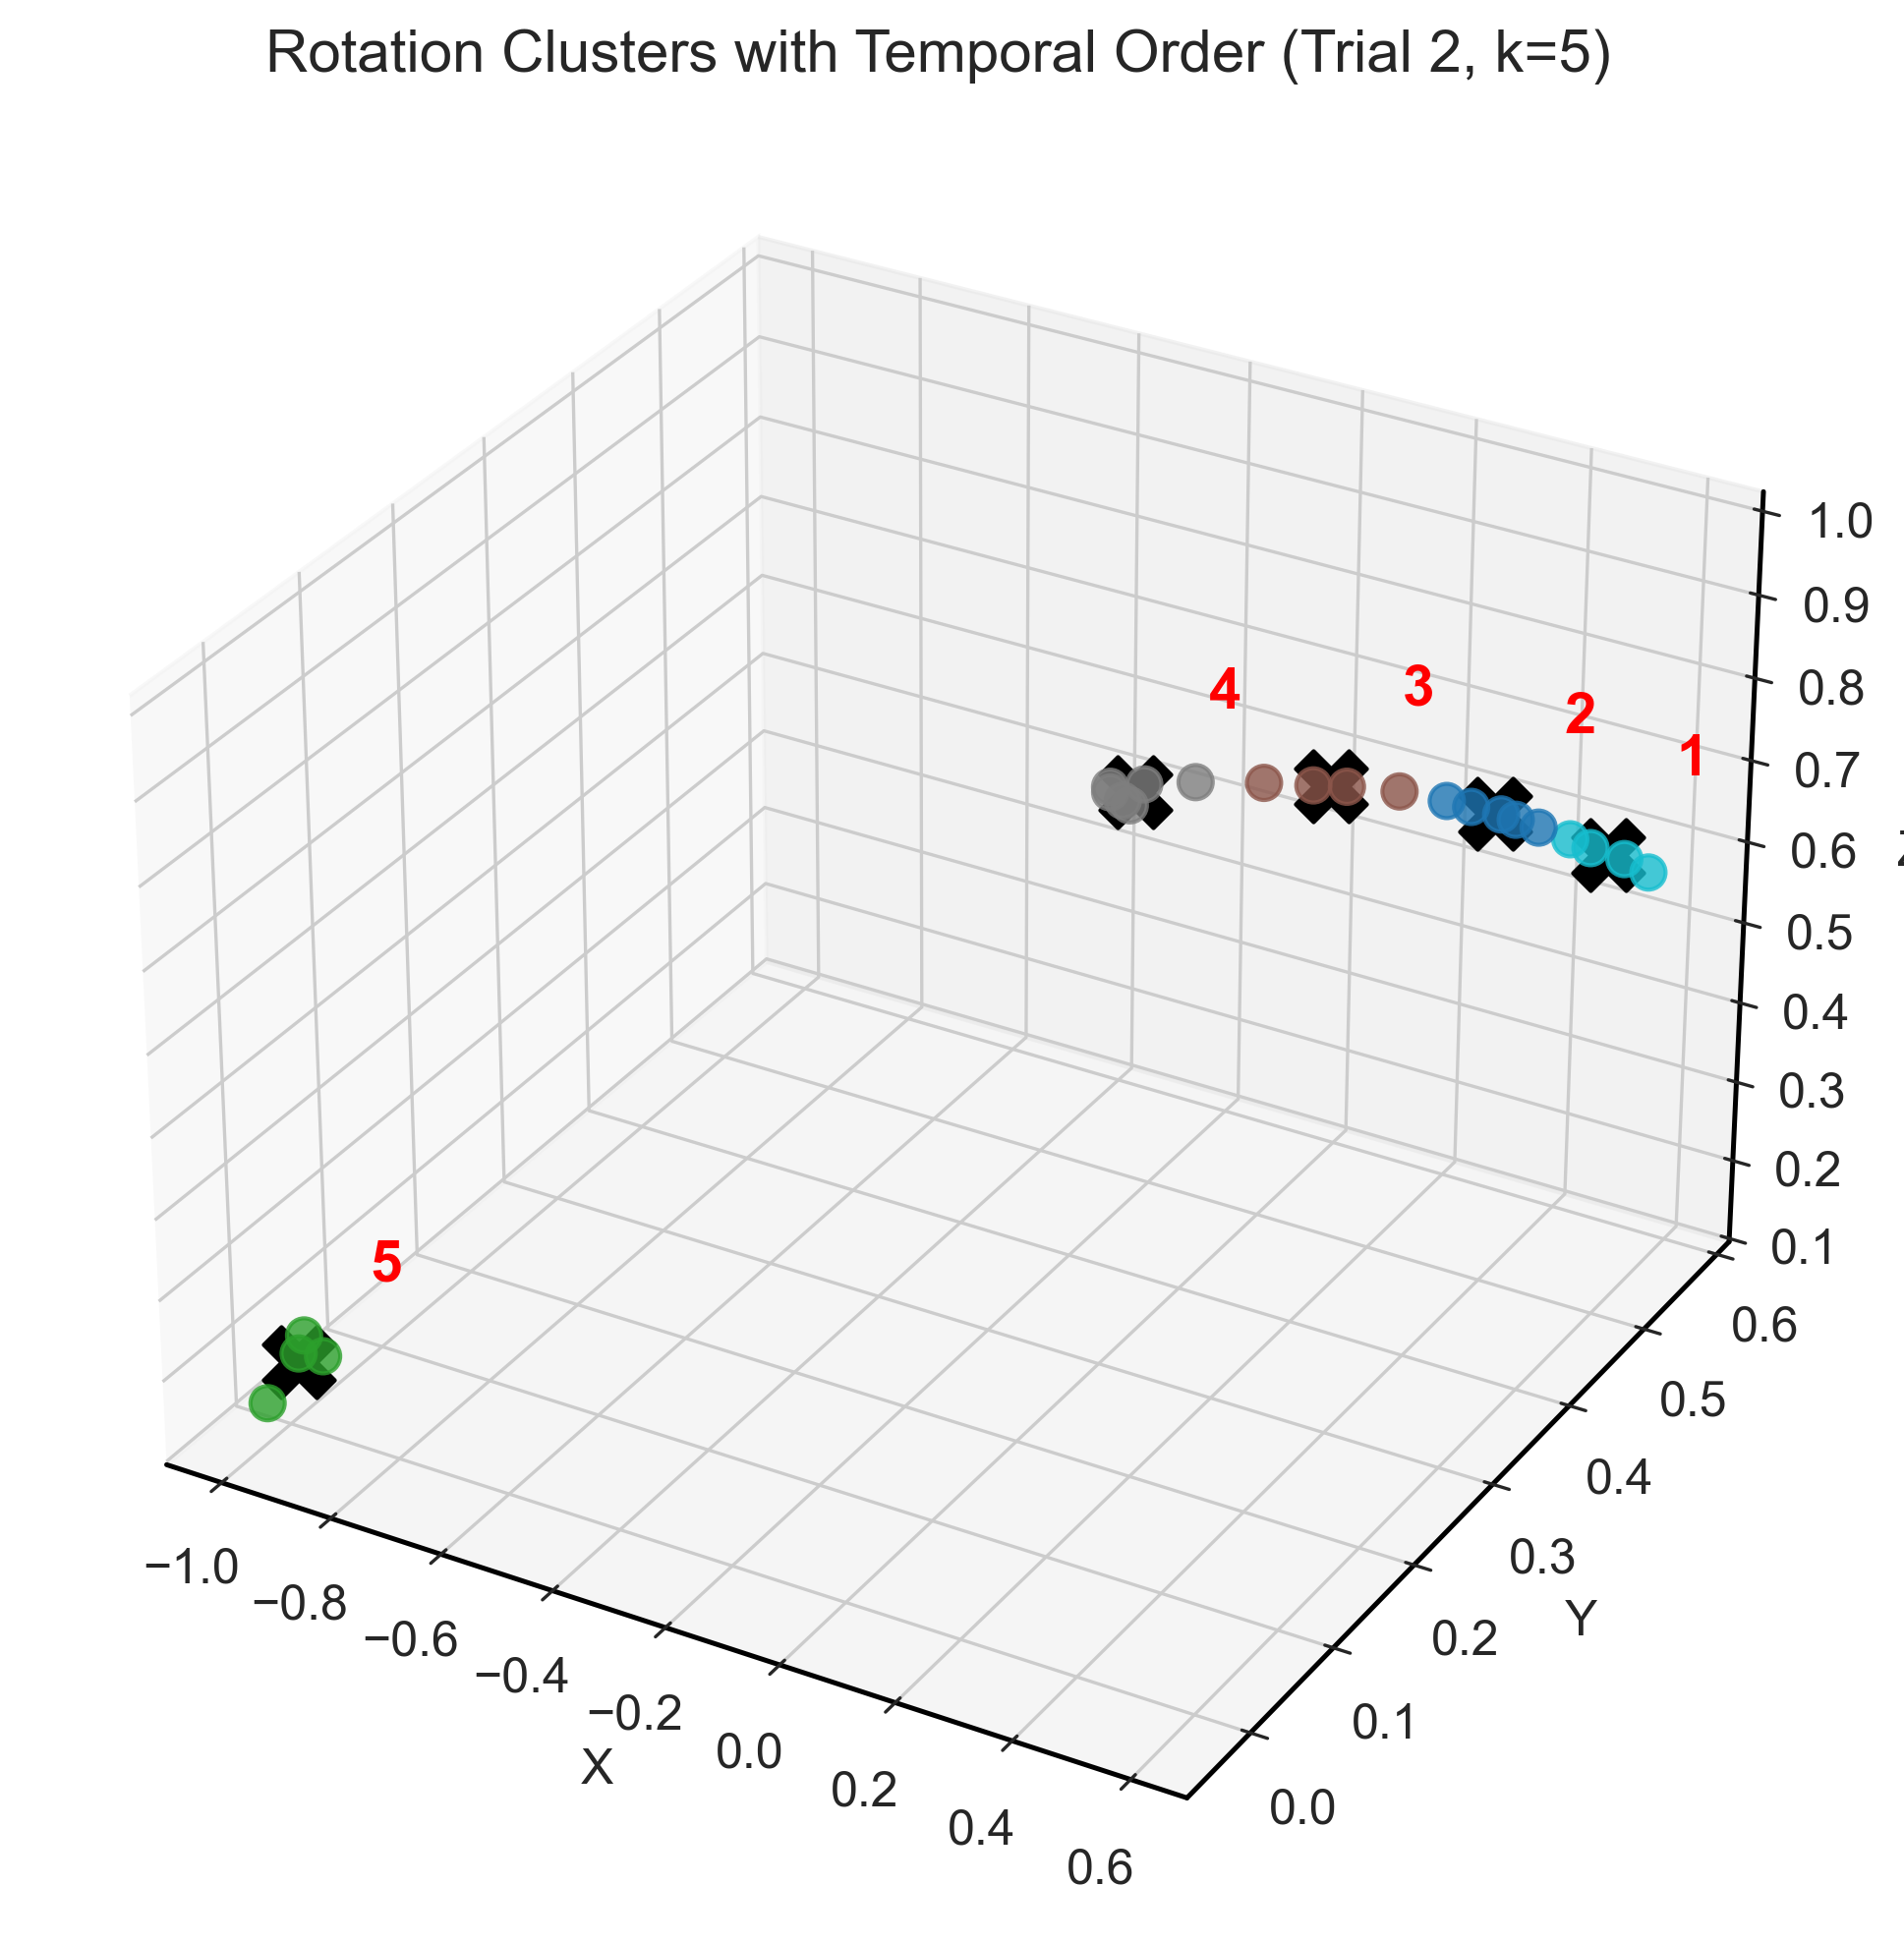


Cluster summary with temporal order:
   cluster  num_points  mean_azimuth  mean_polar  first_time_ms  last_time_ms  \
4        4           4         43.49       50.76           4735          5505   
0        0           5         41.31       40.95           5900          7122   
2        2           4         39.20       29.23           7362          8151   
3        3           6         35.78       17.13           8368         30016   
1        1           4         89.93       79.85          31582         55160   

   temporal_order  
4               1  
0               2  
2               3  
3               4  
1               5  

Temporal sequence of cluster visits:
1. Cluster 4 (4735-5505ms, 0.8s) - 4 rotation points at (43.5°, 50.8°)
2. Cluster 0 (5900-7122ms, 1.2s) - 5 rotation points at (41.3°, 41.0°)
3. Cluster 2 (7362-8151ms, 0.8s) - 4 rotation points at (39.2°, 29.2°)
4. Cluster 3 (8368-30016ms, 21.6s) - 6 rotation points at (35.8°, 17.1°)
5. Cluster 1 (31582-55160ms, 23

In [44]:
# section 1: imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from io import StringIO

# section 2: parse the CSV file and extract ROTATION_ORIENTATION_LOG
with open("Trial1.csv", "r") as f:
    content = f.read()

sections = content.split("\n\n")

rot_section = None
for section in sections:
    if "ROTATION_ORIENTATION_LOG" in section:
        rot_section = section
        break

if rot_section is None:
    raise ValueError("ROTATION_ORIENTATION_LOG section not found in file!")

# extract rows
lines = rot_section.strip().split("\n")
rot_df = pd.read_csv(StringIO("\n".join(lines[1:])))  # skip section header
print("Parsed ROTATION_ORIENTATION_LOG:")
print(rot_df.head())

# section 3: filter one trial (example: trial 2)
trial_id = 2
rot_trial = rot_df[rot_df["trial"] == trial_id].copy()
# Sort by time to ensure proper temporal ordering
rot_trial = rot_trial.sort_values('trialTimeMs').reset_index(drop=True)

# section 4: convert to 3D coordinates
az = np.deg2rad(rot_trial["azimuthalDeg"].values)
pol = np.deg2rad(rot_trial["polarDeg"].values)

x = np.cos(az) * np.sin(pol)
y = np.sin(az) * np.sin(pol)
z = np.cos(pol)

coords = np.vstack([x, y, z]).T

# section 5: clustering (k=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(coords)
rot_trial["cluster"] = labels

# section 6: determine temporal order of clusters
# Find the first time each cluster appears
cluster_first_appearance = rot_trial.groupby("cluster")["trialTimeMs"].min().sort_values()
cluster_temporal_order = {cluster: order+1 for order, cluster in enumerate(cluster_first_appearance.index)}

# Add temporal order to the dataframe
rot_trial["cluster_temporal_order"] = rot_trial["cluster"].map(cluster_temporal_order)

# cluster centers with temporal labels
centers = kmeans.cluster_centers_
cx, cy, cz = centers[:,0], centers[:,1], centers[:,2]

# section 7: 3D plot of clusters with X markers and temporal order numbers
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")

# Plot points colored by cluster
scatter = ax.scatter(x, y, z, c=labels, cmap="tab10", s=70, alpha=0.8)

# Plot cluster centers with X markers and temporal order numbers nearby
for i, (cluster_id, center) in enumerate(zip(range(k), centers)):
    temporal_order = cluster_temporal_order[cluster_id]
    
    # Plot the X marker at cluster center
    ax.scatter(center[0], center[1], center[2], c="black", s=300, marker="X")
    
    # Add small temporal order number next to the X
    ax.text(center[0] + 0.05, center[1] + 0.05, center[2] + 0.05, f"{temporal_order}", 
            fontsize=14, fontweight='bold', color="red", 
            ha='left', va='bottom')

ax.set_title(f"Rotation Clusters with Temporal Order (Trial {trial_id}, k={k})")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

# section 8: enhanced summary table with temporal information
summary = rot_trial.groupby("cluster").agg({
    "rotationIndex": "count",
    "azimuthalDeg": "mean",
    "polarDeg": "mean",
    "trialTimeMs": ["min", "max"],
    "cluster_temporal_order": "first"
}).round(2)

# Flatten column names
summary.columns = ["num_points", "mean_azimuth", "mean_polar", "first_time_ms", "last_time_ms", "temporal_order"]
summary = summary.reset_index()

# Sort by temporal order for cleaner display
summary = summary.sort_values("temporal_order")

print("\nCluster summary with temporal order:")
print("=" * 70)
print(summary)

print(f"\nTemporal sequence of cluster visits:")
print("=" * 40)
for _, row in summary.iterrows():
    duration_s = (row["last_time_ms"] - row["first_time_ms"]) / 1000
    print(f"{int(row['temporal_order'])}. Cluster {int(row['cluster'])} "
          f"({row['first_time_ms']:.0f}-{row['last_time_ms']:.0f}ms, {duration_s:.1f}s) "
          f"- {int(row['num_points'])} rotation points "
          f"at ({row['mean_azimuth']:.1f}°, {row['mean_polar']:.1f}°)")

In [45]:
# Analyze click performance per CLUSTER (meaningful rotations, not jerk rotations)
# We need to assign clicks to clusters based on the clustering we did earlier

print("CLICK PERFORMANCE PER CLUSTER (MEANINGFUL ROTATIONS)")
print("=" * 60)

# First, check what trials we have in the rotation data
from sklearn.cluster import KMeans
from io import StringIO

# Re-parse rotation data 
with open("Trial1.csv", "r") as f:
    content = f.read()

sections = content.split("\n\n")

rot_section = None
for section in sections:
    if "ROTATION_ORIENTATION_LOG" in section:
        rot_section = section
        break

# Parse rotation data
lines = rot_section.strip().split("\n")
rot_df = pd.read_csv(StringIO("\n".join(lines[1:])))

print("Available trials in rotation data:", sorted(rot_df['trial'].unique()))
print("Rotation data shape:", rot_df.shape)
print("\nRotation data by trial:")
for trial in sorted(rot_df['trial'].unique()):
    trial_data = rot_df[rot_df['trial'] == trial]
    print(f"  Trial {trial}: {len(trial_data)} rotation points")

# Function to assign clusters to rotation data
def get_cluster_assignments(trial_id, k=5):
    trial_rot = rot_df[rot_df["trial"] == trial_id].copy()
    
    if len(trial_rot) == 0:
        print(f"Warning: No rotation data found for trial {trial_id}")
        return pd.DataFrame()
    
    if len(trial_rot) < k:
        print(f"Warning: Trial {trial_id} has only {len(trial_rot)} rotation points, reducing k to {len(trial_rot)}")
        k = max(1, len(trial_rot))
    
    trial_rot = trial_rot.sort_values('trialTimeMs').reset_index(drop=True)
    
    # Convert to 3D coordinates
    az = np.deg2rad(trial_rot["azimuthalDeg"].values)
    pol = np.deg2rad(trial_rot["polarDeg"].values)
    
    x = np.cos(az) * np.sin(pol)
    y = np.sin(az) * np.sin(pol)
    z = np.cos(pol)
    
    coords = np.vstack([x, y, z]).T
    
    # If only one point, assign to cluster 0
    if len(coords) == 1:
        trial_rot["cluster"] = [0]
        trial_rot["cluster_temporal_order"] = [1]
        return trial_rot
    
    # Clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(coords)
    trial_rot["cluster"] = labels
    
    # Determine temporal order
    cluster_first_appearance = trial_rot.groupby("cluster")["trialTimeMs"].min().sort_values()
    cluster_temporal_order = {cluster: order+1 for order, cluster in enumerate(cluster_first_appearance.index)}
    trial_rot["cluster_temporal_order"] = trial_rot["cluster"].map(cluster_temporal_order)
    
    return trial_rot

# Get cluster assignments for available trials
all_clusters_list = []
available_trials = sorted(rot_df['trial'].unique())

for trial_id in available_trials:
    trial_clusters = get_cluster_assignments(trial_id)
    if not trial_clusters.empty:
        all_clusters_list.append(trial_clusters)

if not all_clusters_list:
    print("Error: No valid rotation data found for clustering")
else:
    # Combine cluster data
    all_clusters = pd.concat(all_clusters_list, ignore_index=True)

    # Now assign clicks to clusters by matching rotation indices
    click_df_with_clusters = click_df.copy()

    # Create a mapping from (trial, rotationIndex) to cluster
    rotation_to_cluster = {}
    for _, row in all_clusters.iterrows():
        key = (row['trial'], row['rotationIndex'])
        rotation_to_cluster[key] = row['cluster']

    # Assign clusters to clicks
    click_df_with_clusters['cluster'] = click_df_with_clusters.apply(
        lambda row: rotation_to_cluster.get((row['trial'], row['rotationIndex']), np.nan), 
        axis=1
    )

    # Check how many clicks were successfully assigned to clusters
    assigned_clicks = click_df_with_clusters['cluster'].notna().sum()
    total_clicks = len(click_df_with_clusters)
    print(f"\nSuccessfully assigned {assigned_clicks}/{total_clicks} clicks to clusters")

    # Now analyze performance per cluster
    cluster_performance = []

    for trial_id in available_trials:
        trial_clicks = click_df_with_clusters[click_df_with_clusters['trial'] == trial_id].copy()
        trial_rot_data = all_clusters[all_clusters['trial'] == trial_id]
        
        if trial_clicks.empty or trial_rot_data.empty:
            continue
            
        print(f"\nTRIAL {trial_id} CLUSTER PERFORMANCE:")
        print("-" * 40)
        
        # Group by cluster
        clusters_with_clicks = trial_clicks['cluster'].dropna().unique()
        if len(clusters_with_clicks) == 0:
            print(f"  No clusters with clicks found for trial {trial_id}")
            continue
            
        for cluster_id in sorted(clusters_with_clicks):
            cluster_clicks = trial_clicks[trial_clicks['cluster'] == cluster_id]
            
            # Count targets and distractors
            target_picks = len(cluster_clicks[cluster_clicks['colorCategory'] == 'TARGET'])
            distractor_picks = len(cluster_clicks[cluster_clicks['colorCategory'] == 'DISTRACTOR'])
            
            # Since participant only used LEFT_PICK:
            correct_targets = target_picks  # All targets correctly picked
            incorrect_distractors = distractor_picks  # All distractors incorrectly picked
            
            total_clicks = target_picks + distractor_picks
            
            # Get cluster temporal order and time span
            cluster_rot_data = trial_rot_data[trial_rot_data['cluster'] == cluster_id]
            if not cluster_rot_data.empty:
                temporal_order = cluster_rot_data['cluster_temporal_order'].iloc[0]
                start_time = cluster_rot_data['trialTimeMs'].min()
                end_time = cluster_rot_data['trialTimeMs'].max()
                duration_ms = end_time - start_time
                duration_s = duration_ms / 1000
                
                # Get mean orientation for this cluster
                mean_az = cluster_rot_data['azimuthalDeg'].mean()
                mean_pol = cluster_rot_data['polarDeg'].mean()
            else:
                temporal_order = np.nan
                duration_s = 0
                mean_az = np.nan
                mean_pol = np.nan
            
            click_rate = total_clicks / duration_s if duration_s > 0 else 0
            
            print(f"  Cluster {int(cluster_id)} (Temporal order: {int(temporal_order) if not np.isnan(temporal_order) else 'N/A'}):")
            print(f"    Orientation: ({mean_az:.1f}°, {mean_pol:.1f}°)")
            print(f"    Target picks (correct): {correct_targets}")
            print(f"    Distractor picks (incorrect): {incorrect_distractors}")
            print(f"    Total clicks: {total_clicks}")
            print(f"    Duration: {duration_s:.1f}s")
            print(f"    Click rate: {click_rate:.2f} Hz")
            
            # Calculate accuracy
            if total_clicks > 0:
                accuracy = (correct_targets / total_clicks) * 100
                print(f"    Accuracy: {accuracy:.1f}%")
            else:
                print(f"    Accuracy: N/A (no clicks)")
            print()
            
            # Store for summary
            cluster_performance.append({
                'trial': trial_id,
                'cluster': cluster_id,
                'temporal_order': temporal_order if not np.isnan(temporal_order) else 0,
                'mean_azimuth': mean_az,
                'mean_polar': mean_pol,
                'target_picks': correct_targets,
                'distractor_picks': incorrect_distractors,
                'total_clicks': total_clicks,
                'duration_s': duration_s,
                'click_rate_hz': click_rate,
                'accuracy_pct': (correct_targets / total_clicks * 100) if total_clicks > 0 else 0
            })

    # Create summary DataFrame
    if cluster_performance:
        cluster_perf_df = pd.DataFrame(cluster_performance)

        print("\nCLUSTER SUMMARY TABLE:")
        print("=" * 60)
        print(cluster_perf_df.round(2))

        # Overall statistics
        print(f"\nOVERALL CLUSTER STATISTICS:")
        print("=" * 35)
        print(f"Total meaningful rotations (clusters): {len(cluster_perf_df)}")
        print(f"Average targets per cluster: {cluster_perf_df['target_picks'].mean():.1f}")
        print(f"Average distractors per cluster: {cluster_perf_df['distractor_picks'].mean():.1f}")
        print(f"Average accuracy per cluster: {cluster_perf_df['accuracy_pct'].mean():.1f}%")
        print(f"Average click rate per cluster: {cluster_perf_df['click_rate_hz'].mean():.2f} Hz")
        print(f"Average duration per cluster: {cluster_perf_df['duration_s'].mean():.1f}s")
    else:
        print("No cluster performance data available.")

CLICK PERFORMANCE PER CLUSTER (MEANINGFUL ROTATIONS)
Available trials in rotation data: [np.int64(2)]
Rotation data shape: (23, 5)

Rotation data by trial:
  Trial 2: 23 rotation points

Successfully assigned 191/358 clicks to clusters

TRIAL 2 CLUSTER PERFORMANCE:
----------------------------------------
  Cluster 0 (Temporal order: 2):
    Orientation: (41.3°, 40.9°)
    Target picks (correct): 2
    Distractor picks (incorrect): 4
    Total clicks: 6
    Duration: 1.2s
    Click rate: 4.91 Hz
    Accuracy: 33.3%

  Cluster 1 (Temporal order: 5):
    Orientation: (89.9°, 79.9°)
    Target picks (correct): 29
    Distractor picks (incorrect): 62
    Total clicks: 91
    Duration: 23.6s
    Click rate: 3.86 Hz
    Accuracy: 31.9%

  Cluster 2 (Temporal order: 3):
    Orientation: (39.2°, 29.2°)
    Target picks (correct): 2
    Distractor picks (incorrect): 2
    Total clicks: 4
    Duration: 0.8s
    Click rate: 5.07 Hz
    Accuracy: 50.0%

  Cluster 3 (Temporal order: 4):
    Orienta

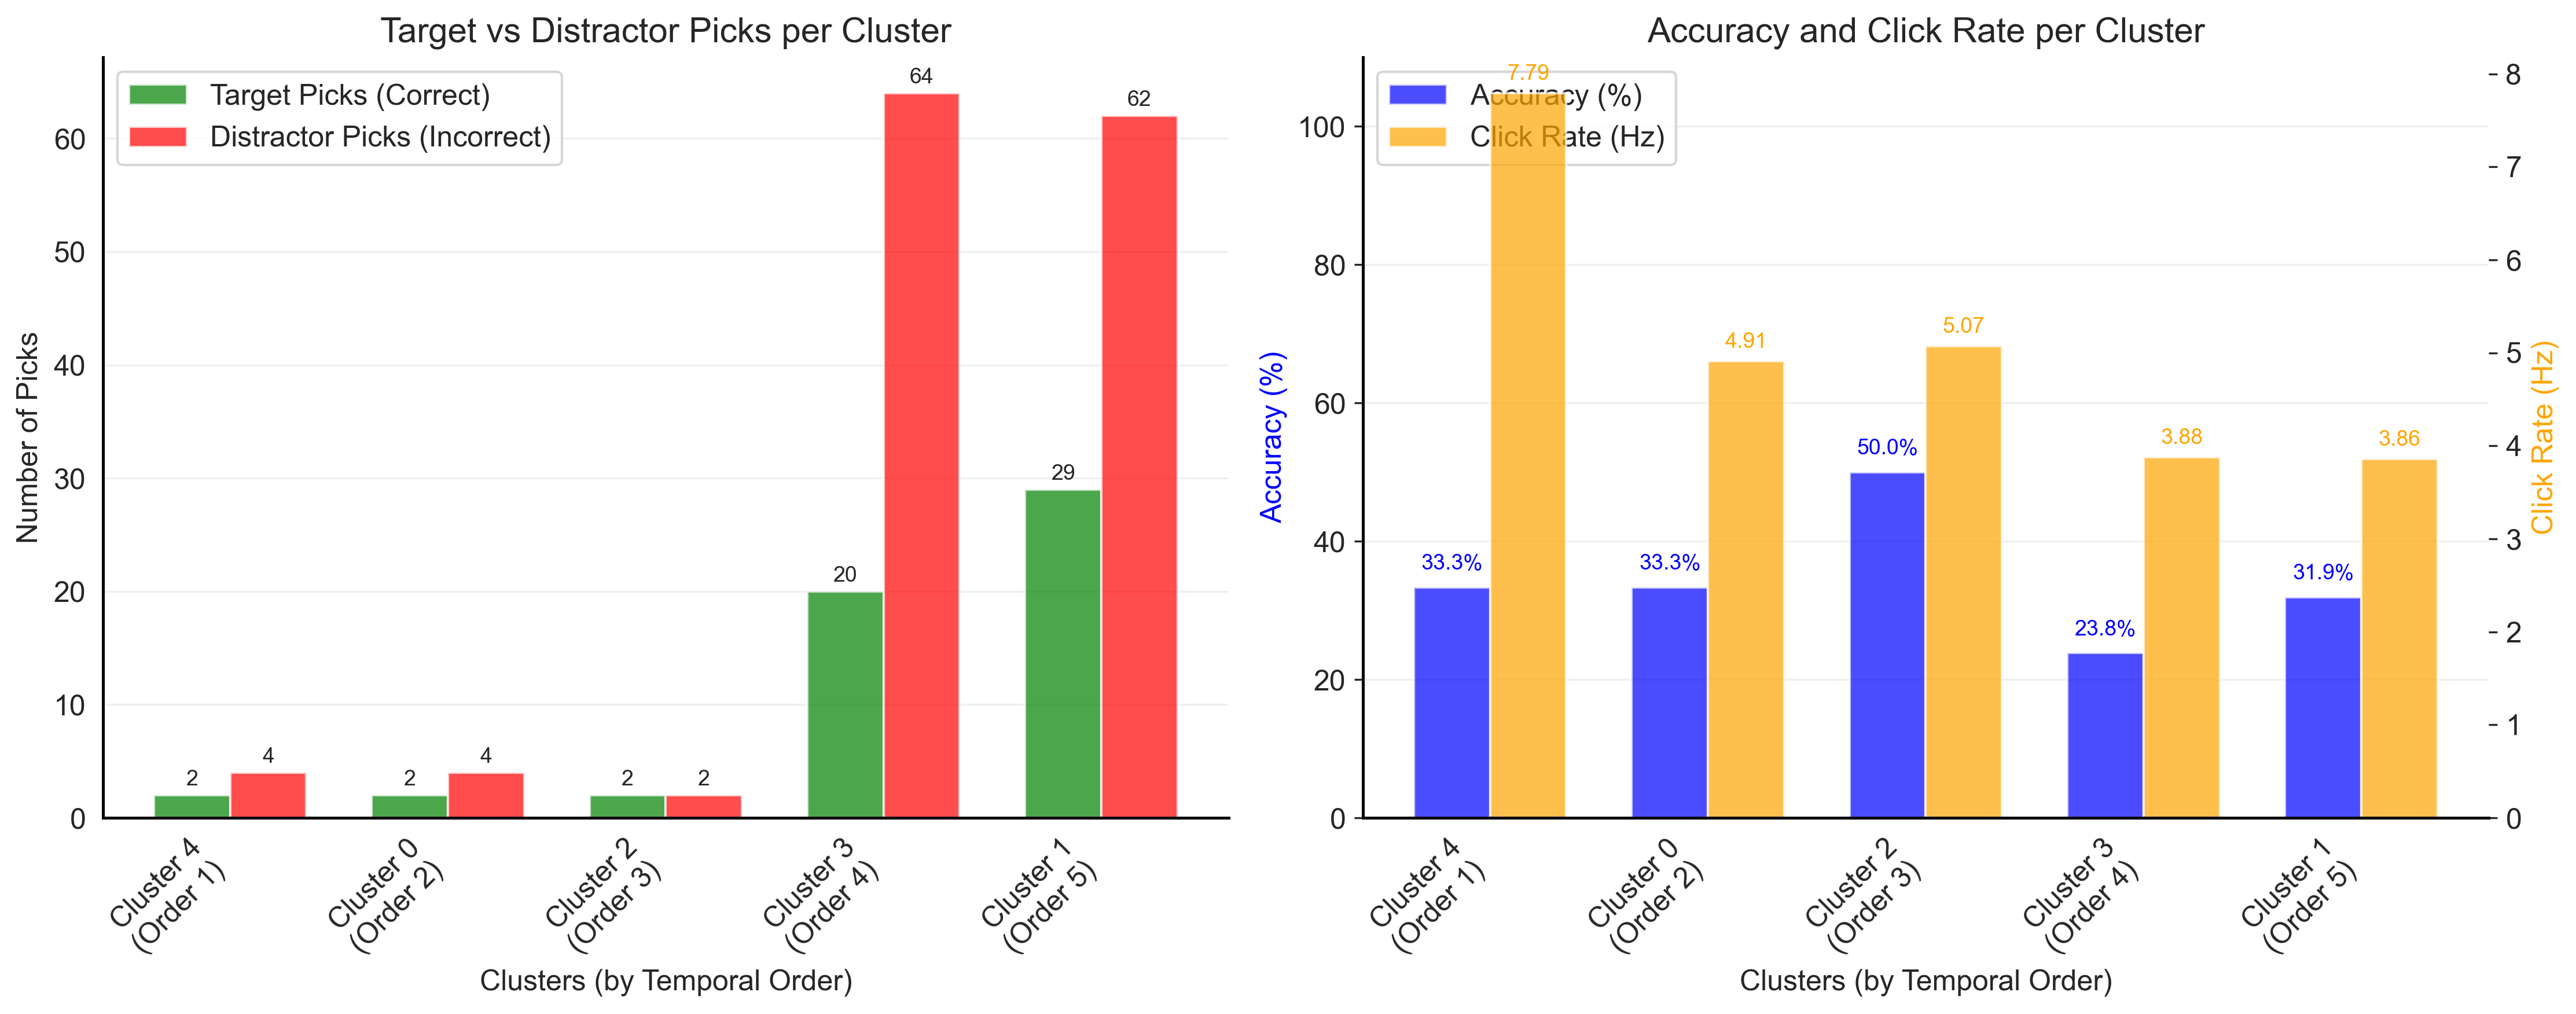

CLUSTER PERFORMANCE SUMMARY:
Cluster 4 (Temporal order 1):
  • Location: (43.5°, 50.8°)
  • Targets: 2, Distractors: 4
  • Accuracy: 33.3%, Click rate: 7.79 Hz
  • Duration: 0.8s

Cluster 0 (Temporal order 2):
  • Location: (41.3°, 40.9°)
  • Targets: 2, Distractors: 4
  • Accuracy: 33.3%, Click rate: 4.91 Hz
  • Duration: 1.2s

Cluster 2 (Temporal order 3):
  • Location: (39.2°, 29.2°)
  • Targets: 2, Distractors: 2
  • Accuracy: 50.0%, Click rate: 5.07 Hz
  • Duration: 0.8s

Cluster 3 (Temporal order 4):
  • Location: (35.8°, 17.1°)
  • Targets: 20, Distractors: 64
  • Accuracy: 23.8%, Click rate: 3.88 Hz
  • Duration: 21.6s

Cluster 1 (Temporal order 5):
  • Location: (89.9°, 79.9°)
  • Targets: 29, Distractors: 62
  • Accuracy: 31.9%, Click rate: 3.86 Hz
  • Duration: 23.6s



In [46]:
# Plot target and distractor results for each cluster
import matplotlib.pyplot as plt
import numpy as np

# Check if cluster_perf_df exists and plot the results
if 'cluster_perf_df' in locals() and not cluster_perf_df.empty:
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Sort by temporal order for better visualization
    plot_data = cluster_perf_df.sort_values('temporal_order').reset_index(drop=True)
    
    # Create cluster labels with temporal order
    cluster_labels = [f"Cluster {int(row['cluster'])}\n(Order {int(row['temporal_order'])})" 
                     for _, row in plot_data.iterrows()]
    
    x_positions = np.arange(len(cluster_labels))
    width = 0.35
    
    # Plot 1: Target and Distractor Picks
    target_picks = plot_data['target_picks'].values
    distractor_picks = plot_data['distractor_picks'].values
    
    bars1 = ax1.bar(x_positions - width/2, target_picks, width, 
                    label='Target Picks (Correct)', color='green', alpha=0.7)
    bars2 = ax1.bar(x_positions + width/2, distractor_picks, width, 
                    label='Distractor Picks (Incorrect)', color='red', alpha=0.7)
    
    ax1.set_xlabel('Clusters (by Temporal Order)')
    ax1.set_ylabel('Number of Picks')
    ax1.set_title('Target vs Distractor Picks per Cluster')
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(cluster_labels, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    set_solo_border(ax1)
    
    # Plot 2: Accuracy and Click Rate
    accuracy_pct = plot_data['accuracy_pct'].values
    click_rate_hz = plot_data['click_rate_hz'].values
    
    # Create twin axis for click rate
    ax2_twin = ax2.twinx()
    
    bars3 = ax2.bar(x_positions - width/2, accuracy_pct, width, 
                    label='Accuracy (%)', color='blue', alpha=0.7)
    bars4 = ax2_twin.bar(x_positions + width/2, click_rate_hz, width, 
                        label='Click Rate (Hz)', color='orange', alpha=0.7)
    
    ax2.set_xlabel('Clusters (by Temporal Order)')
    ax2.set_ylabel('Accuracy (%)', color='blue')
    ax2_twin.set_ylabel('Click Rate (Hz)', color='orange')
    ax2.set_title('Accuracy and Click Rate per Cluster')
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(cluster_labels, rotation=45, ha='right')
    ax2.set_ylim(0, 110)  # Set accuracy range 0-110%
    
    # Add value labels
    for bar in bars3:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, color='blue')
    
    for bar in bars4:
        height = bar.get_height()
        ax2_twin.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=9, color='orange')
    
    # Combine legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    ax2.grid(axis='y', alpha=0.3)
    set_solo_border(ax2)
    set_solo_border(ax2_twin)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for easy reference
    print("CLUSTER PERFORMANCE SUMMARY:")
    print("=" * 50)
    for _, row in plot_data.iterrows():
        print(f"Cluster {int(row['cluster'])} (Temporal order {int(row['temporal_order'])}):")
        print(f"  • Location: ({row['mean_azimuth']:.1f}°, {row['mean_polar']:.1f}°)")
        print(f"  • Targets: {int(row['target_picks'])}, Distractors: {int(row['distractor_picks'])}")
        print(f"  • Accuracy: {row['accuracy_pct']:.1f}%, Click rate: {row['click_rate_hz']:.2f} Hz")
        print(f"  • Duration: {row['duration_s']:.1f}s")
        print()
        
else:
    print("Error: cluster_perf_df not found. Please run the cluster analysis first.")

In [47]:
# Check what actions are actually present in the data
print("ACTIONS ANALYSIS:")
print("=" * 30)
print("Available actions:", click_df['action'].unique())
print("Action counts:", click_df['action'].value_counts())
print("\nColor categories:", click_df['colorCategory'].unique())

# Check if there are any RIGHT_PICK actions (distractor rejections)
right_picks = click_df[click_df['action'] == 'RIGHT_PICK']
print(f"\nRIGHT_PICK actions found: {len(right_picks)}")

if len(right_picks) > 0:
    print("RIGHT_PICK breakdown by color category:")
    print(right_picks['colorCategory'].value_counts())
else:
    print("No RIGHT_PICK actions found - participant only harvested, never rejected!")

ACTIONS ANALYSIS:
Available actions: ['LEFT_PICK' 'RIGHT_REJECT']
Action counts: action
RIGHT_REJECT    184
LEFT_PICK       174
Name: count, dtype: int64

Color categories: ['DISTRACTOR' 'TARGET']

RIGHT_PICK actions found: 0
No RIGHT_PICK actions found - participant only harvested, never rejected!


In [48]:
# CORRECTED cluster analysis with proper distractor rejection accounting
print("CORRECTED CLUSTER PERFORMANCE ANALYSIS")
print("=" * 50)
print("Including proper accounting for distractor rejections!")
print()

# Re-analyze with correct categorization
if 'cluster_perf_df' in locals() and not cluster_perf_df.empty:
    
    # Create corrected analysis
    corrected_performance = []
    
    for trial_id in available_trials:
        trial_clicks = click_df_with_clusters[click_df_with_clusters['trial'] == trial_id].copy()
        trial_rot_data = all_clusters[all_clusters['trial'] == trial_id]
        
        if trial_clicks.empty or trial_rot_data.empty:
            continue
            
        print(f"TRIAL {trial_id} CORRECTED CLUSTER PERFORMANCE:")
        print("-" * 45)
        
        clusters_with_clicks = trial_clicks['cluster'].dropna().unique()
        if len(clusters_with_clicks) == 0:
            continue
            
        for cluster_id in sorted(clusters_with_clicks):
            cluster_clicks = trial_clicks[trial_clicks['cluster'] == cluster_id]
            
            # Proper categorization:
            target_harvests = len(cluster_clicks[(cluster_clicks['colorCategory'] == 'TARGET') & 
                                               (cluster_clicks['action'] == 'LEFT_PICK')])
            target_rejects = len(cluster_clicks[(cluster_clicks['colorCategory'] == 'TARGET') & 
                                              (cluster_clicks['action'] == 'RIGHT_PICK')])
            
            distractor_harvests = len(cluster_clicks[(cluster_clicks['colorCategory'] == 'DISTRACTOR') & 
                                                    (cluster_clicks['action'] == 'LEFT_PICK')])
            distractor_rejects = len(cluster_clicks[(cluster_clicks['colorCategory'] == 'DISTRACTOR') & 
                                                   (cluster_clicks['action'] == 'RIGHT_PICK')])
            
            # Correct vs incorrect responses
            correct_responses = target_harvests + distractor_rejects  # Correct target picks + correct distractor rejections
            incorrect_responses = target_rejects + distractor_harvests  # Incorrect target rejects + incorrect distractor picks
            
            total_clicks = target_harvests + target_rejects + distractor_harvests + distractor_rejects
            
            # Get cluster info
            cluster_rot_data = trial_rot_data[trial_rot_data['cluster'] == cluster_id]
            if not cluster_rot_data.empty:
                temporal_order = cluster_rot_data['cluster_temporal_order'].iloc[0]
                start_time = cluster_rot_data['trialTimeMs'].min()
                end_time = cluster_rot_data['trialTimeMs'].max()
                duration_ms = end_time - start_time
                duration_s = duration_ms / 1000
                mean_az = cluster_rot_data['azimuthalDeg'].mean()
                mean_pol = cluster_rot_data['polarDeg'].mean()
            else:
                temporal_order = np.nan
                duration_s = 0
                mean_az = np.nan
                mean_pol = np.nan
            
            click_rate = total_clicks / duration_s if duration_s > 0 else 0
            accuracy = (correct_responses / total_clicks * 100) if total_clicks > 0 else 0
            
            print(f"  Cluster {int(cluster_id)} (Temporal order: {int(temporal_order) if not np.isnan(temporal_order) else 'N/A'}):")
            print(f"    Orientation: ({mean_az:.1f}°, {mean_pol:.1f}°)")
            print(f"    Target harvests (correct): {target_harvests}")
            print(f"    Target rejects (incorrect): {target_rejects}")
            print(f"    Distractor harvests (incorrect): {distractor_harvests}")
            print(f"    Distractor rejects (correct): {distractor_rejects}")
            print(f"    TOTAL correct responses: {correct_responses}")
            print(f"    TOTAL incorrect responses: {incorrect_responses}")
            print(f"    Total clicks: {total_clicks}")
            print(f"    Duration: {duration_s:.1f}s")
            print(f"    Click rate: {click_rate:.2f} Hz")
            print(f"    TRUE Accuracy: {accuracy:.1f}%")
            print()
            
            # Store corrected data
            corrected_performance.append({
                'trial': trial_id,
                'cluster': cluster_id,
                'temporal_order': temporal_order if not np.isnan(temporal_order) else 0,
                'mean_azimuth': mean_az,
                'mean_polar': mean_pol,
                'target_harvests_correct': target_harvests,
                'target_rejects_incorrect': target_rejects,
                'distractor_harvests_incorrect': distractor_harvests,
                'distractor_rejects_correct': distractor_rejects,
                'total_correct': correct_responses,
                'total_incorrect': incorrect_responses,
                'total_clicks': total_clicks,
                'duration_s': duration_s,
                'click_rate_hz': click_rate,
                'true_accuracy_pct': accuracy
            })
    
    # Create corrected DataFrame
    if corrected_performance:
        corrected_perf_df = pd.DataFrame(corrected_performance)
        
        print("CORRECTED CLUSTER SUMMARY TABLE:")
        print("=" * 70)
        print(corrected_perf_df.round(2))
        
        print(f"\nCORRECTED OVERALL STATISTICS:")
        print("=" * 40)
        print(f"Total meaningful rotations (clusters): {len(corrected_perf_df)}")
        print(f"Average target harvests per cluster: {corrected_perf_df['target_harvests_correct'].mean():.1f}")
        print(f"Average target rejects per cluster: {corrected_perf_df['target_rejects_incorrect'].mean():.1f}")
        print(f"Average distractor harvests per cluster: {corrected_perf_df['distractor_harvests_incorrect'].mean():.1f}")
        print(f"Average distractor rejects per cluster: {corrected_perf_df['distractor_rejects_correct'].mean():.1f}")
        print(f"Average total correct per cluster: {corrected_perf_df['total_correct'].mean():.1f}")
        print(f"Average total incorrect per cluster: {corrected_perf_df['total_incorrect'].mean():.1f}")
        print(f"Average TRUE accuracy per cluster: {corrected_perf_df['true_accuracy_pct'].mean():.1f}%")
        print(f"Average click rate per cluster: {corrected_perf_df['click_rate_hz'].mean():.2f} Hz")
        
        # Store in global variable for plotting
        globals()['corrected_perf_df'] = corrected_perf_df
        
    else:
        print("No corrected performance data available.")
else:
    print("Error: Original cluster_perf_df not found. Please run the previous cluster analysis first.")

CORRECTED CLUSTER PERFORMANCE ANALYSIS
Including proper accounting for distractor rejections!

TRIAL 2 CORRECTED CLUSTER PERFORMANCE:
---------------------------------------------
  Cluster 0 (Temporal order: 2):
    Orientation: (41.3°, 40.9°)
    Target harvests (correct): 2
    Target rejects (incorrect): 0
    Distractor harvests (incorrect): 4
    Distractor rejects (correct): 0
    TOTAL correct responses: 2
    TOTAL incorrect responses: 4
    Total clicks: 6
    Duration: 1.2s
    Click rate: 4.91 Hz
    TRUE Accuracy: 33.3%

  Cluster 1 (Temporal order: 5):
    Orientation: (89.9°, 79.9°)
    Target harvests (correct): 4
    Target rejects (incorrect): 0
    Distractor harvests (incorrect): 25
    Distractor rejects (correct): 0
    TOTAL correct responses: 4
    TOTAL incorrect responses: 25
    Total clicks: 29
    Duration: 23.6s
    Click rate: 1.23 Hz
    TRUE Accuracy: 13.8%

  Cluster 2 (Temporal order: 3):
    Orientation: (39.2°, 29.2°)
    Target harvests (correct): 

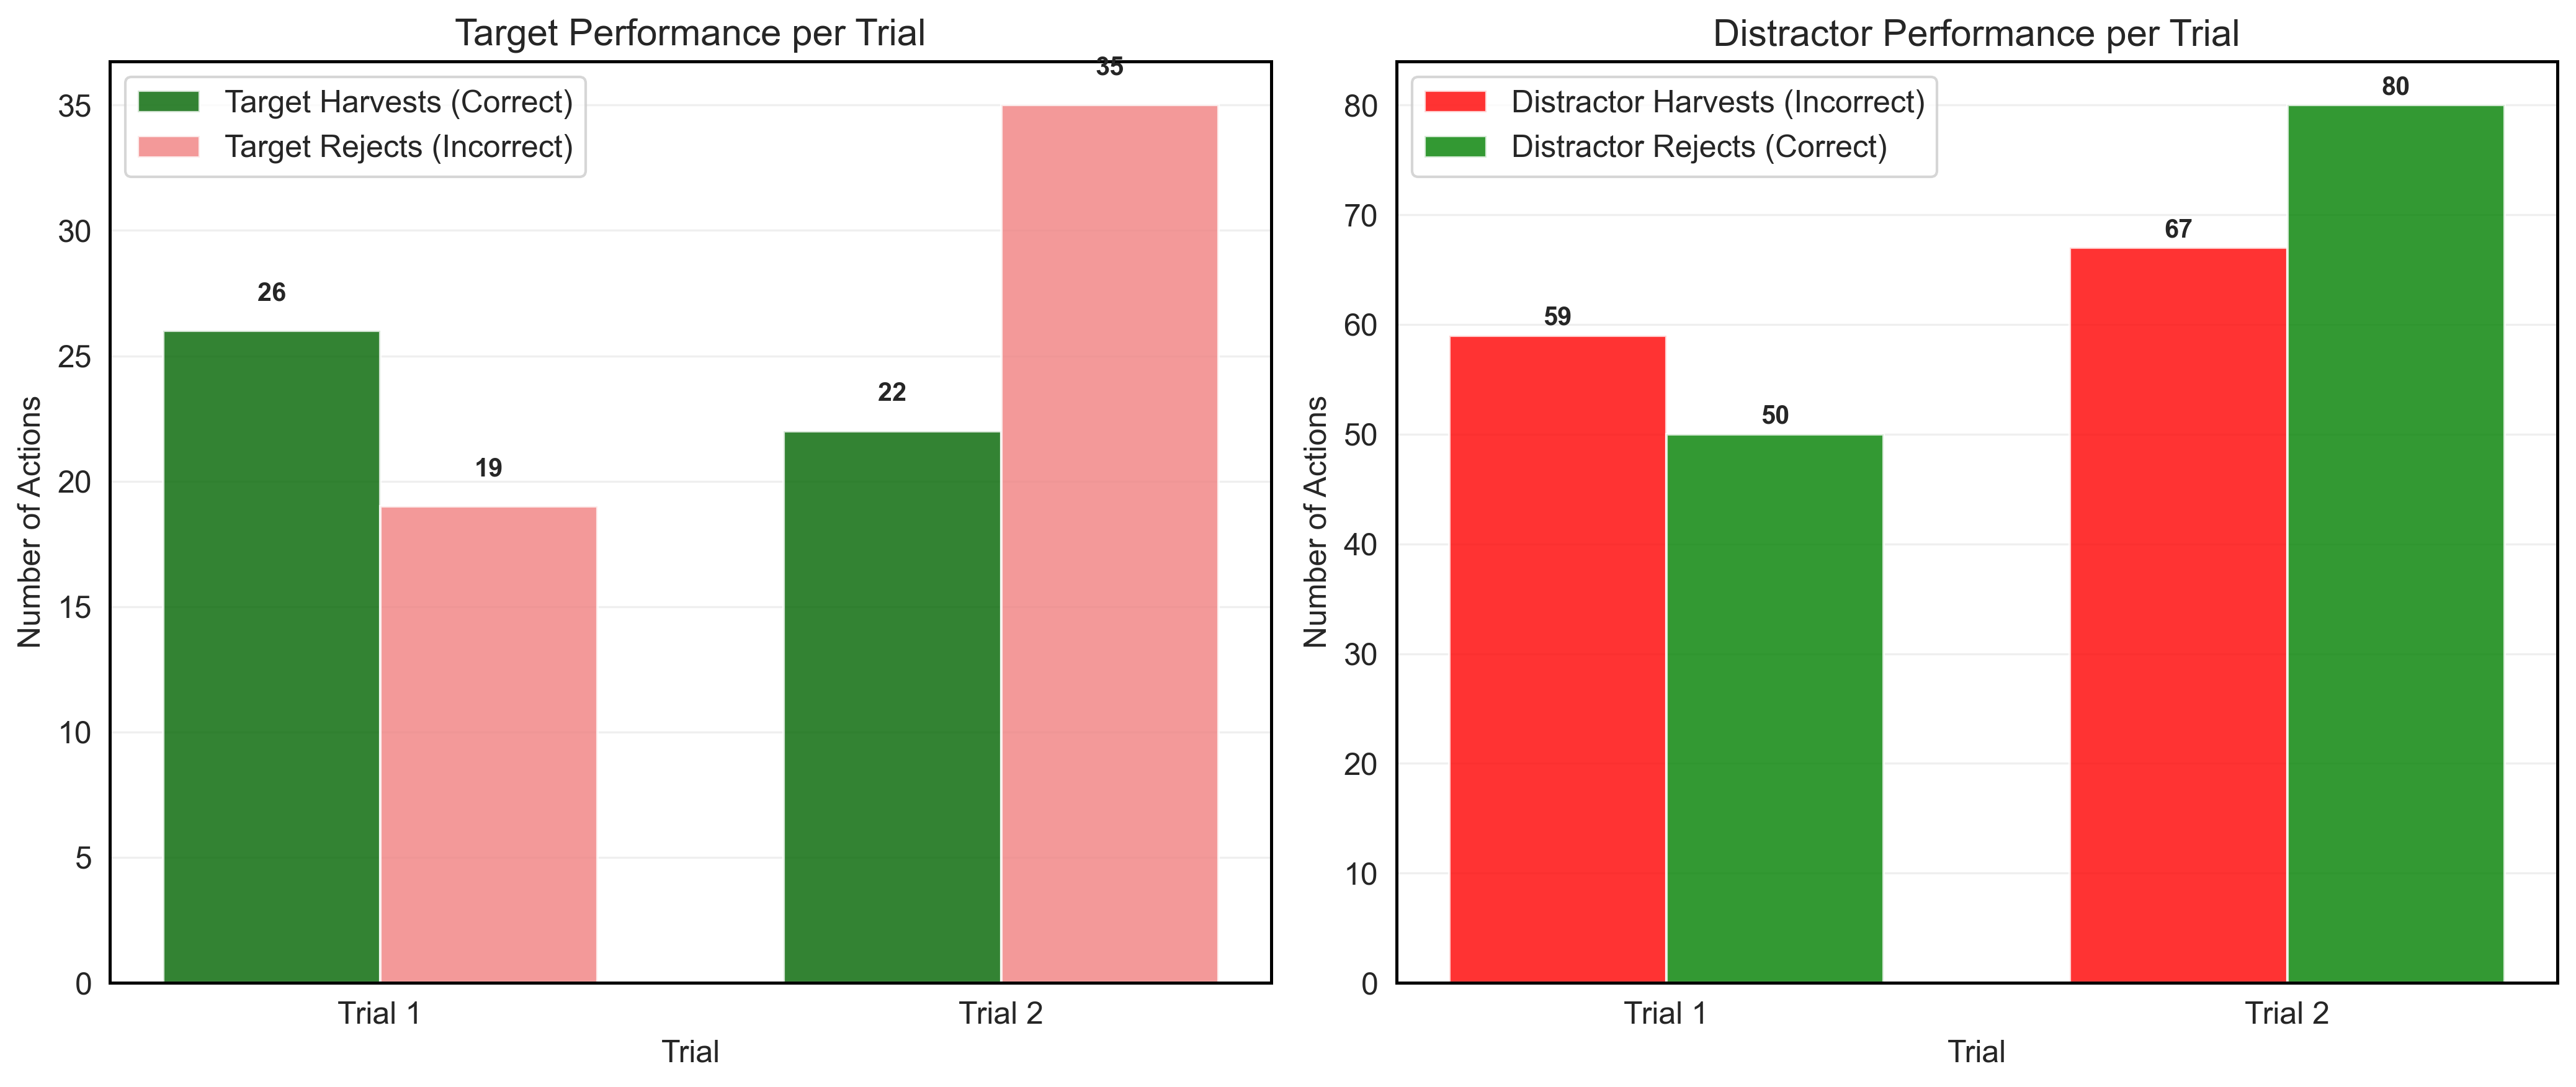

TRIAL PERFORMANCE SUMMARY:
   trial  target_harvests_correct  target_rejects_incorrect  \
0      1                       26                        19   
1      2                       22                        35   

   distractor_harvests_incorrect  distractor_rejects_correct  
0                             59                          50  
1                             67                          80  

Total trials analyzed: 2

DETAILED ACTION BREAKDOWN:

Trial 1:
  DISTRACTOR + LEFT_PICK: 59 (INCORRECT)
  DISTRACTOR + RIGHT_REJECT: 50 (CORRECT)
  TARGET + LEFT_PICK: 26 (CORRECT)
  TARGET + RIGHT_REJECT: 19 (INCORRECT)

Trial 2:
  DISTRACTOR + LEFT_PICK: 67 (INCORRECT)
  DISTRACTOR + RIGHT_REJECT: 80 (CORRECT)
  TARGET + LEFT_PICK: 22 (CORRECT)
  TARGET + RIGHT_REJECT: 35 (INCORRECT)


In [52]:
# Trial-level analysis: Target picks and distractor rejections per trial
import matplotlib.pyplot as plt
import numpy as np

# Analyze each trial's performance breakdown
trial_performance = []

for trial_id in sorted(click_df['trial'].unique()):
    trial_data = click_df[click_df['trial'] == trial_id]
    
    # Target analysis (correct = LEFT_PICK, incorrect = RIGHT_REJECT)
    target_harvests_correct = len(trial_data[(trial_data['colorCategory'] == 'TARGET') & 
                                           (trial_data['action'] == 'LEFT_PICK')])
    target_rejects_incorrect = len(trial_data[(trial_data['colorCategory'] == 'TARGET') & 
                                            (trial_data['action'] == 'RIGHT_REJECT')])
    
    # Distractor analysis (correct = RIGHT_REJECT, incorrect = LEFT_PICK)
    distractor_harvests_incorrect = len(trial_data[(trial_data['colorCategory'] == 'DISTRACTOR') & 
                                                 (trial_data['action'] == 'LEFT_PICK')])
    distractor_rejects_correct = len(trial_data[(trial_data['colorCategory'] == 'DISTRACTOR') & 
                                              (trial_data['action'] == 'RIGHT_REJECT')])
    
    trial_performance.append({
        'trial': trial_id,
        'target_harvests_correct': target_harvests_correct,
        'target_rejects_incorrect': target_rejects_incorrect,
        'distractor_harvests_incorrect': distractor_harvests_incorrect,
        'distractor_rejects_correct': distractor_rejects_correct
    })

trial_perf_df = pd.DataFrame(trial_performance)

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

trials = trial_perf_df['trial'].values
width = 0.35

# Plot 1: Target Performance per Trial
target_correct = trial_perf_df['target_harvests_correct'].values
target_incorrect = trial_perf_df['target_rejects_incorrect'].values

x_pos1 = np.arange(len(trials))
bars1 = ax1.bar(x_pos1 - width/2, target_correct, width, 
                label='Target Harvests (Correct)', color='darkgreen', alpha=0.8)
bars2 = ax1.bar(x_pos1 + width/2, target_incorrect, width, 
                label='Target Rejects (Incorrect)', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Trial')
ax1.set_ylabel('Number of Actions')
ax1.set_title('Target Performance per Trial')
ax1.set_xticks(x_pos1)
ax1.set_xticklabels([f'Trial {int(t)}' for t in trials])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Distractor Performance per Trial
distractor_incorrect = trial_perf_df['distractor_harvests_incorrect'].values
distractor_correct = trial_perf_df['distractor_rejects_correct'].values

x_pos2 = np.arange(len(trials))
bars3 = ax2.bar(x_pos2 - width/2, distractor_incorrect, width, 
                label='Distractor Harvests (Incorrect)', color='red', alpha=0.8)
bars4 = ax2.bar(x_pos2 + width/2, distractor_correct, width, 
                label='Distractor Rejects (Correct)', color='green', alpha=0.8)

ax2.set_xlabel('Trial')
ax2.set_ylabel('Number of Actions')
ax2.set_title('Distractor Performance per Trial')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels([f'Trial {int(t)}' for t in trials])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars3:
    height = bar.get_height()
    if height > 0:
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars4:
    height = bar.get_height()
    if height > 0:
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("TRIAL PERFORMANCE SUMMARY:")
print("=" * 40)
print(trial_perf_df)
print(f"\nTotal trials analyzed: {len(trial_perf_df)}")

# Print detailed breakdown by action type
print("\nDETAILED ACTION BREAKDOWN:")
print("=" * 40)
for trial_id in sorted(trial_perf_df['trial'].unique()):
    trial_data = click_df[click_df['trial'] == trial_id]
    print(f"\nTrial {trial_id}:")
    action_breakdown = trial_data.groupby(['colorCategory', 'action']).size()
    for (category, action), count in action_breakdown.items():
        correctness = ""
        if category == 'TARGET' and action == 'LEFT_PICK':
            correctness = "(CORRECT)"
        elif category == 'TARGET' and action == 'RIGHT_REJECT':
            correctness = "(INCORRECT)"
        elif category == 'DISTRACTOR' and action == 'LEFT_PICK':
            correctness = "(INCORRECT)"
        elif category == 'DISTRACTOR' and action == 'RIGHT_REJECT':
            correctness = "(CORRECT)"
        print(f"  {category} + {action}: {count} {correctness}")

In [51]:
# Let's check what action values we actually have in the data
print("Unique actions in click data:")
print(click_df['action'].unique())
print("\nCombinations of colorCategory and action:")
print(click_df.groupby(['colorCategory', 'action']).size())
print("\nFirst few rows to see actual data:")
print(click_df[['colorCategory', 'action']].head(10))

Unique actions in click data:
['LEFT_PICK' 'RIGHT_REJECT']

Combinations of colorCategory and action:
colorCategory  action      
DISTRACTOR     LEFT_PICK       126
               RIGHT_REJECT    130
TARGET         LEFT_PICK        48
               RIGHT_REJECT     54
dtype: int64

First few rows to see actual data:
  colorCategory        action
0    DISTRACTOR     LEFT_PICK
1    DISTRACTOR     LEFT_PICK
2    DISTRACTOR     LEFT_PICK
3    DISTRACTOR     LEFT_PICK
4        TARGET     LEFT_PICK
5        TARGET  RIGHT_REJECT
6        TARGET  RIGHT_REJECT
7    DISTRACTOR  RIGHT_REJECT
8    DISTRACTOR  RIGHT_REJECT
9        TARGET  RIGHT_REJECT


In [55]:
# First, let's check what columns are available
print("ALL_CLUSTERS columns:")
print(all_clusters.columns.tolist())
print("\nFirst few rows of all_clusters:")
print(all_clusters.head())

# CORRECTED CLUSTER-LEVEL ANALYSIS: Fix the action naming and logic
corrected_performance = []

for cluster in sorted(all_clusters['cluster'].unique()):
    if pd.isna(cluster):
        continue
        
    cluster_data = click_df_with_clusters[click_df_with_clusters['cluster'] == cluster]
    
    if len(cluster_data) == 0:
        continue
    
    # Correct analysis using the actual action names: LEFT_PICK and RIGHT_REJECT
    target_harvests_correct = len(cluster_data[(cluster_data['colorCategory'] == 'TARGET') & 
                                             (cluster_data['action'] == 'LEFT_PICK')])
    target_rejects_incorrect = len(cluster_data[(cluster_data['colorCategory'] == 'TARGET') & 
                                              (cluster_data['action'] == 'RIGHT_REJECT')])
    
    distractor_harvests_incorrect = len(cluster_data[(cluster_data['colorCategory'] == 'DISTRACTOR') & 
                                                   (cluster_data['action'] == 'LEFT_PICK')])
    distractor_rejects_correct = len(cluster_data[(cluster_data['colorCategory'] == 'DISTRACTOR') & 
                                                (cluster_data['action'] == 'RIGHT_REJECT')])
    
    total_correct = target_harvests_correct + distractor_rejects_correct
    total_incorrect = target_rejects_incorrect + distractor_harvests_incorrect
    total_clicks = len(cluster_data)
    
    # Get cluster info - use correct column names
    cluster_rot_data = all_clusters[all_clusters['cluster'] == cluster]
    if len(cluster_rot_data) > 0:
        # Check what columns exist and use them correctly
        available_cols = cluster_rot_data.columns.tolist()
        if 'az' in available_cols:
            mean_az = cluster_rot_data['az'].mean()
        elif 'azimuth' in available_cols:
            mean_az = cluster_rot_data['azimuth'].mean()
        else:
            mean_az = None
            
        if 'pol' in available_cols:
            mean_pol = cluster_rot_data['pol'].mean()
        elif 'polar' in available_cols:
            mean_pol = cluster_rot_data['polar'].mean()
        else:
            mean_pol = None
            
        if 'duration_s' in available_cols:
            duration_s = cluster_rot_data['duration_s'].sum()
        else:
            duration_s = 1.0  # default
            
        temporal_order = cluster_temporal_order[cluster]
        trial = cluster_rot_data['trial'].iloc[0]
    else:
        mean_az = mean_pol = duration_s = temporal_order = trial = None
    
    true_accuracy_pct = (total_correct / total_clicks * 100) if total_clicks > 0 else 0
    click_rate_hz = total_clicks / duration_s if duration_s and duration_s > 0 else 0
    
    corrected_performance.append({
        'trial': trial,
        'cluster': cluster,
        'temporal_order': temporal_order,
        'mean_azimuth': mean_az,
        'mean_polar': mean_pol,
        'target_harvests_correct': target_harvests_correct,
        'target_rejects_incorrect': target_rejects_incorrect,
        'distractor_harvests_incorrect': distractor_harvests_incorrect,
        'distractor_rejects_correct': distractor_rejects_correct,
        'total_correct': total_correct,
        'total_incorrect': total_incorrect,
        'total_clicks': total_clicks,
        'duration_s': duration_s,
        'click_rate_hz': click_rate_hz,
        'true_accuracy_pct': true_accuracy_pct
    })

# Create the corrected DataFrame
fixed_corrected_perf_df = pd.DataFrame(corrected_performance)

print("\nFIXED CORRECTED PERFORMANCE ANALYSIS:")
print("=" * 50)
print(fixed_corrected_perf_df[['cluster', 'target_harvests_correct', 'target_rejects_incorrect', 
                               'distractor_harvests_incorrect', 'distractor_rejects_correct']].head())

print(f"\nTotal distractor rejections (should NOT be zero): {fixed_corrected_perf_df['distractor_rejects_correct'].sum()}")
print(f"Total target rejections: {fixed_corrected_perf_df['target_rejects_incorrect'].sum()}")
print(f"Total correct actions: {fixed_corrected_perf_df['total_correct'].sum()}")
print(f"Total incorrect actions: {fixed_corrected_perf_df['total_incorrect'].sum()}")

ALL_CLUSTERS columns:
['trial', 'rotationIndex', 'trialTimeMs', 'azimuthalDeg', 'polarDeg', 'cluster', 'cluster_temporal_order']

First few rows of all_clusters:
   trial  rotationIndex  trialTimeMs  azimuthalDeg  polarDeg  cluster  \
0      2              1         4735         44.65     54.64        4   
1      2              2         5092         44.07     52.16        4   
2      2              3         5284         42.81     49.03        4   
3      2              4         5505         42.44     47.19        4   
4      2              5         5900         41.87     44.47        0   

   cluster_temporal_order  
0                       1  
1                       1  
2                       1  
3                       1  
4                       2  

FIXED CORRECTED PERFORMANCE ANALYSIS:
   cluster  target_harvests_correct  target_rejects_incorrect  \
0        0                        2                         0   
1        1                        4                        25 

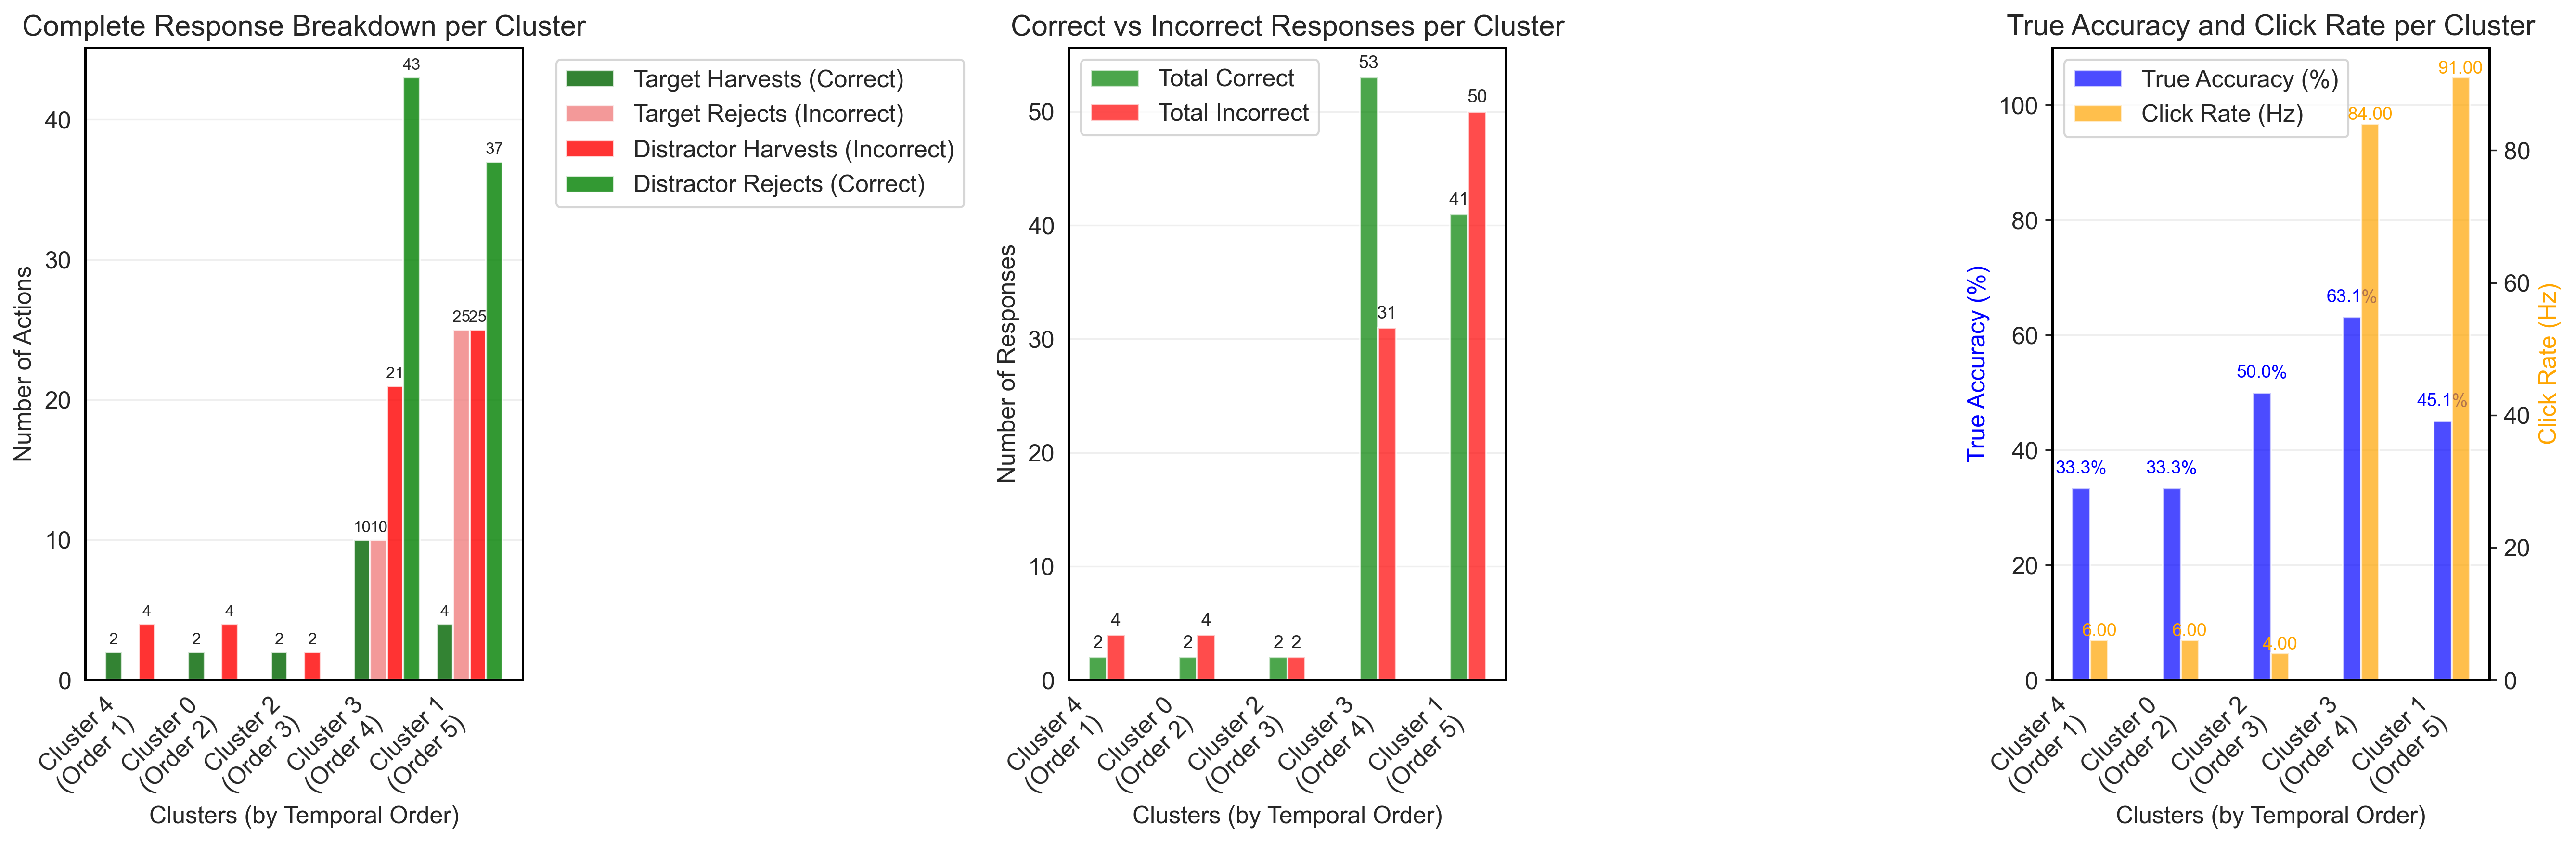

In [57]:
# CORRECTED VISUALIZATION: Target harvests, distractor harvests, and distractor rejections
import matplotlib.pyplot as plt
import numpy as np

if 'fixed_corrected_perf_df' in locals() and not fixed_corrected_perf_df.empty:
    
    # Create comprehensive visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Sort by temporal order
    plot_data = fixed_corrected_perf_df.sort_values('temporal_order').reset_index(drop=True)
    
    # Create cluster labels
    cluster_labels = [f"Cluster {int(row['cluster'])}\n(Order {int(row['temporal_order'])})" 
                     for _, row in plot_data.iterrows()]
    
    x_positions = np.arange(len(cluster_labels))
    width = 0.2
    
    # Plot 1: All Response Types (4 categories)
    target_harvests = plot_data['target_harvests_correct'].values
    target_rejects = plot_data['target_rejects_incorrect'].values
    distractor_harvests = plot_data['distractor_harvests_incorrect'].values
    distractor_rejects = plot_data['distractor_rejects_correct'].values
    
    bars1 = ax1.bar(x_positions - 1.5*width, target_harvests, width, 
                    label='Target Harvests (Correct)', color='darkgreen', alpha=0.8)
    bars2 = ax1.bar(x_positions - 0.5*width, target_rejects, width, 
                    label='Target Rejects (Incorrect)', color='lightcoral', alpha=0.8)
    bars3 = ax1.bar(x_positions + 0.5*width, distractor_harvests, width, 
                    label='Distractor Harvests (Incorrect)', color='red', alpha=0.8)
    bars4 = ax1.bar(x_positions + 1.5*width, distractor_rejects, width, 
                    label='Distractor Rejects (Correct)', color='green', alpha=0.8)
    
    ax1.set_xlabel('Clusters (by Temporal Order)')
    ax1.set_ylabel('Number of Actions')
    ax1.set_title('Complete Response Breakdown per Cluster')
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(cluster_labels, rotation=45, ha='right')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2, bars3, bars4]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                        f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # Plot 2: Correct vs Incorrect Responses
    total_correct = plot_data['total_correct'].values
    total_incorrect = plot_data['total_incorrect'].values
    
    bars5 = ax2.bar(x_positions - width/2, total_correct, width, 
                    label='Total Correct', color='green', alpha=0.7)
    bars6 = ax2.bar(x_positions + width/2, total_incorrect, width, 
                    label='Total Incorrect', color='red', alpha=0.7)
    
    ax2.set_xlabel('Clusters (by Temporal Order)')
    ax2.set_ylabel('Number of Responses')
    ax2.set_title('Correct vs Incorrect Responses per Cluster')
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(cluster_labels, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bars in [bars5, bars6]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    # Plot 3: True Accuracy and Click Rate
    true_accuracy = plot_data['true_accuracy_pct'].values
    click_rate_hz = plot_data['click_rate_hz'].values
    
    ax3_twin = ax3.twinx()
    
    bars7 = ax3.bar(x_positions - width/2, true_accuracy, width, 
                    label='True Accuracy (%)', color='blue', alpha=0.7)
    bars8 = ax3_twin.bar(x_positions + width/2, click_rate_hz, width, 
                        label='Click Rate (Hz)', color='orange', alpha=0.7)
    
    ax3.set_xlabel('Clusters (by Temporal Order)')
    ax3.set_ylabel('True Accuracy (%)', color='blue')
    ax3_twin.set_ylabel('Click Rate (Hz)', color='orange')
    ax3.set_title('True Accuracy and Click Rate per Cluster')
    ax3.set_xticks(x_positions)
    ax3.set_xticklabels(cluster_labels, rotation=45, ha='right')
    ax3.set_ylim(0, 110)
    
    # Add value labels
    for bar in bars7:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, color='blue')
    
    for bar in bars8:
        height = bar.get_height()
        ax3_twin.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=9, color='orange')
    
    # Combine legends
    lines1, labels1 = ax3.get_legend_handles_labels()
    lines2, labels2 = ax3_twin.get_legend_handles_labels()
    ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    ax3.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [63]:
# DEBUG: Let's check why cluster assignment is failing
print("DEBUGGING CLUSTER ASSIGNMENT:")
print("=" * 50)

# Check the data sources
print(f"Click_df shape: {click_df.shape}")
print(f"Click_df trials: {click_df['trial'].unique()}")
print(f"Click_df columns: {click_df.columns.tolist()}")

print(f"\nRot_clustered shape: {rot_clustered.shape}")
print(f"Rot_clustered trials: {rot_clustered['trial'].unique()}")
print(f"Rot_clustered columns: {rot_clustered.columns.tolist()}")

# Check if Trial 1 data exists
trial1_clicks = click_df[click_df['trial'] == 1]
trial1_rots = rot_clustered[rot_clustered['trial'] == 1]

print(f"\nTrial 1 clicks: {len(trial1_clicks)}")
print(f"Trial 1 rotations: {len(trial1_rots)}")

if len(trial1_rots) > 0:
    print("\nFirst few rotation entries for Trial 1:")
    print(trial1_rots[['trialTimeMs', 'startMs', 'endMs', 'cluster']].head())
    
if len(trial1_clicks) > 0:
    print("\nFirst few click entries for Trial 1:")
    print(trial1_clicks[['trialTimeMs', 'colorCategory']].head())
    
    # Test the assignment function manually
    print("\nTesting cluster assignment for first few clicks:")
    for i, (_, click) in enumerate(trial1_clicks.head().iterrows()):
        click_time = click['trialTimeMs']
        found_cluster = None
        for _, rot_row in trial1_rots.iterrows():
            if rot_row["startMs"] <= click_time < rot_row["endMs"]:
                found_cluster = rot_row["cluster"]
                break
        print(f"Click {i+1}: time={click_time}, cluster={found_cluster}")
        if i >= 4:  # Only show first 5
            break

DEBUGGING CLUSTER ASSIGNMENT:
Click_df shape: (358, 14)
Click_df trials: [1 2]
Click_df columns: ['participant', 'age', 'gender', 'trial', 'globalTimeMs', 'trialTimeMs', 'rtPrevMs', 'instanceId', 'colorHex', 'colorCategory', 'action', 'screenX', 'screenY', 'depth']

Rot_clustered shape: (23, 8)
Rot_clustered trials: [2]
Rot_clustered columns: ['trial', 'rotationIndex', 'trialTimeMs', 'azimuthalDeg', 'polarDeg', 'cluster', 'startMs', 'endMs']

Trial 1 clicks: 154
Trial 1 rotations: 0

First few click entries for Trial 1:
   trialTimeMs colorCategory
0         1195    DISTRACTOR
1         1614    DISTRACTOR
2         2010    DISTRACTOR
3         2551    DISTRACTOR
4         3154        TARGET

Testing cluster assignment for first few clicks:
Click 1: time=1195, cluster=None
Click 2: time=1614, cluster=None
Click 3: time=2010, cluster=None
Click 4: time=2551, cluster=None
Click 5: time=3154, cluster=None


⚠️  No rotation data available for Trial 1
   Clicks available: 154
   Rotations available: 0
Trial 2: 192/204 clicks assigned to clusters

===== Trial 2 =====
Overall depth distribution (per category):
colorCategory  DISTRACTOR  TARGET
depth                            
0                       2       0
1                      10       4
2                      10       2
3                      42      19
4                      49      18
5                      11       1
6                       8       4
7                      13       4
8                       2       5

Per cluster depth distribution (per category):
colorCategory  DISTRACTOR  TARGET
cluster depth                    
0.0     0               1       0
        1               8       3
        2               5       0
        3              14       2
        4               9       3
        5               6       1
        6               6       3
        7              13       4
        8               2       5
1

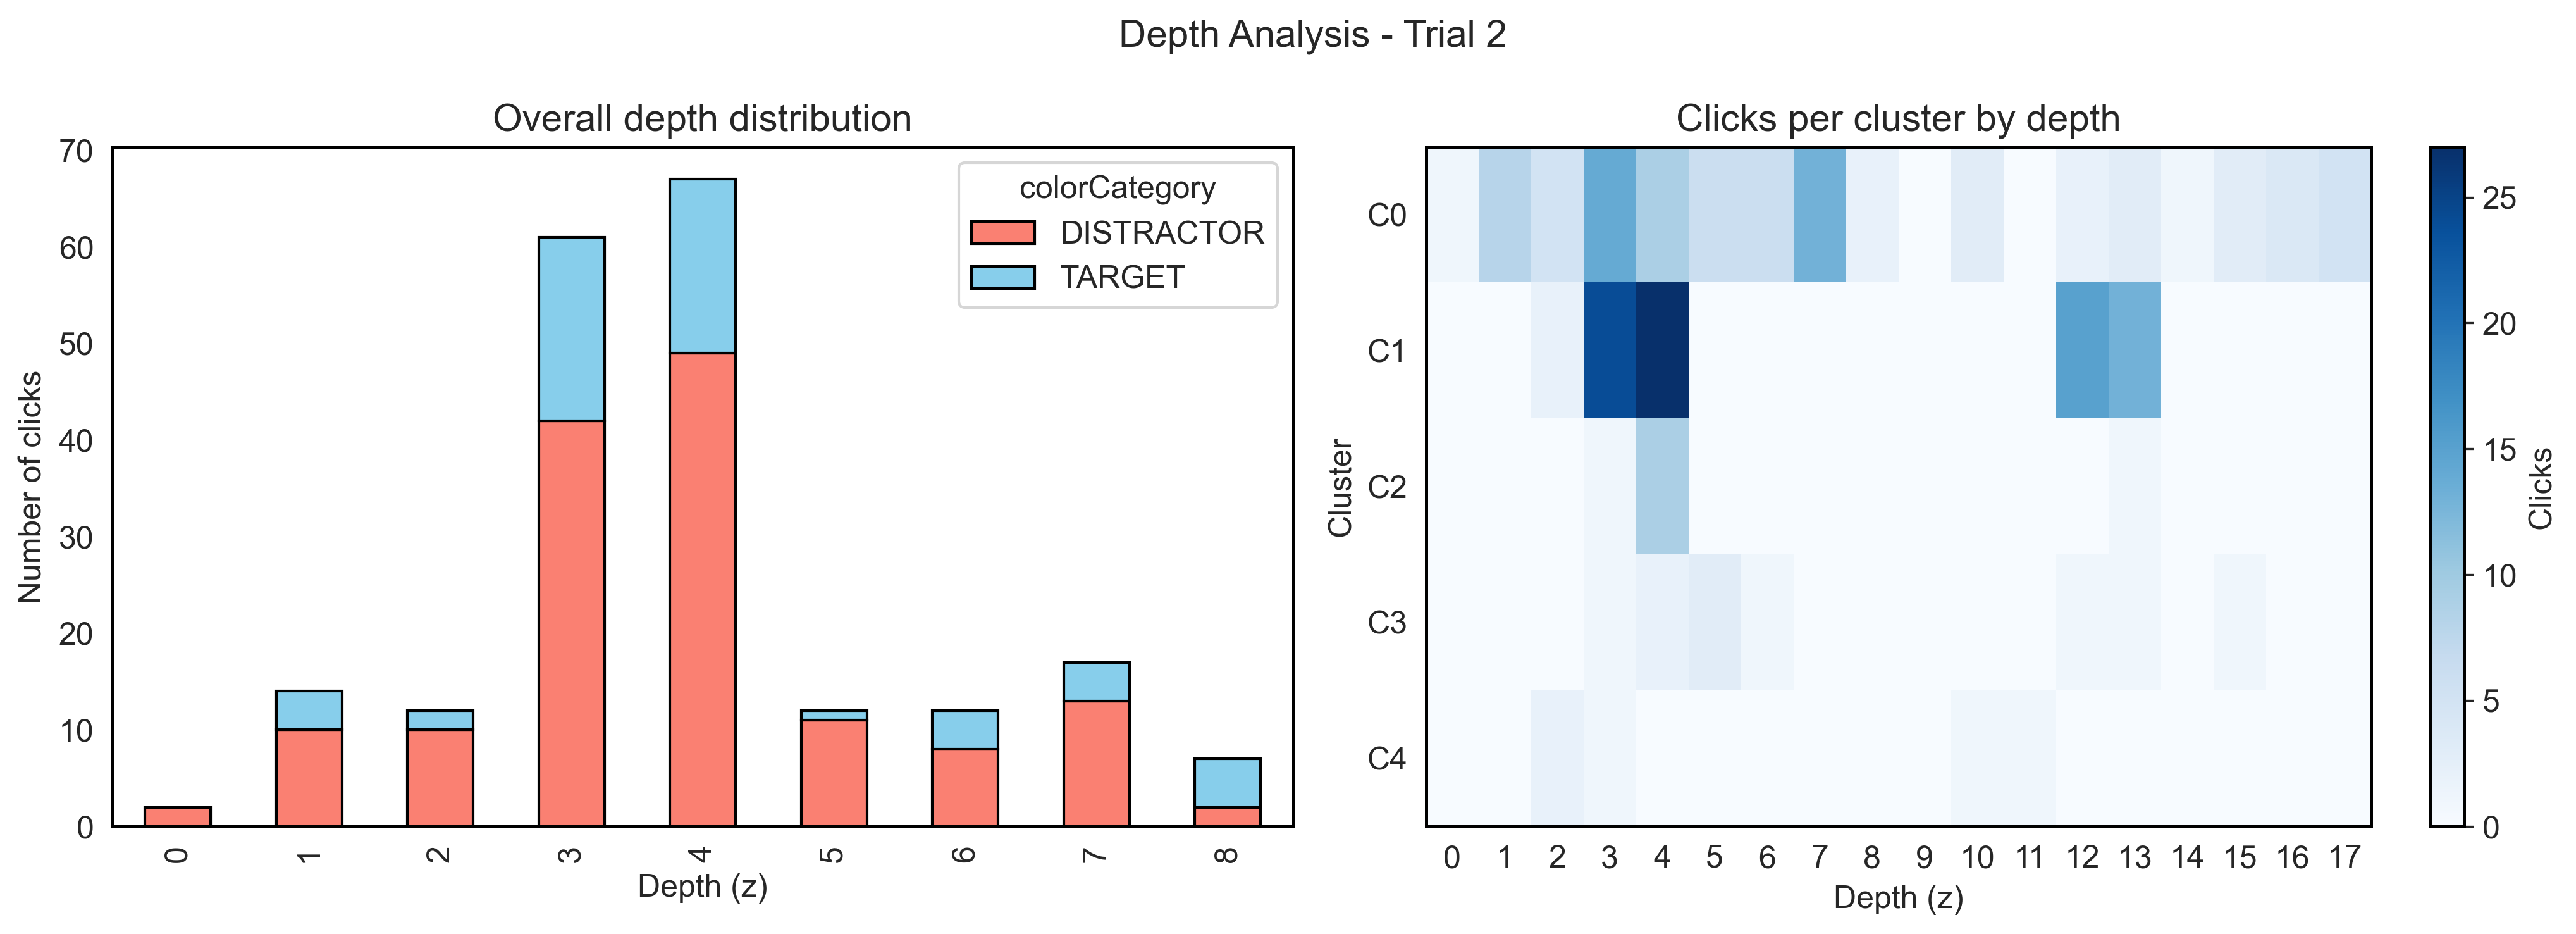

In [66]:
# FIXED DEPTH ANALYSIS: Only analyze trials with both click and rotation data
def safe_depth_analysis(clicks, clusters, trial_id):
    clicks_trial = clicks[clicks["trial"] == trial_id].copy()
    clusters_trial = clusters[clusters["trial"] == trial_id].copy()
    
    # Check if we have rotation data for this trial
    if len(clusters_trial) == 0:
        print(f"⚠️  No rotation data available for Trial {trial_id}")
        print(f"   Clicks available: {len(clicks_trial)}")
        print(f"   Rotations available: {len(clusters_trial)}")
        return None, None, None

    # assign cluster to each click
    clicks_trial = assign_clusters(clicks_trial, clusters_trial)
    
    # Remove clicks that couldn't be assigned to clusters
    clicks_with_clusters = clicks_trial.dropna(subset=['cluster'])
    print(f"Trial {trial_id}: {len(clicks_with_clusters)}/{len(clicks_trial)} clicks assigned to clusters")

    # overall depth counts (by TARGET/DISTRACTOR)
    trial_depth_dist = (
        clicks_trial.groupby(["depth", "colorCategory"])
        .size()
        .unstack(fill_value=0)
    )

    # per cluster depth counts (only for clicks with clusters)
    if len(clicks_with_clusters) > 0:
        cluster_depth_dist = (
            clicks_with_clusters.groupby(["cluster", "depth", "colorCategory"])
            .size()
            .unstack(fill_value=0)
        )
    else:
        cluster_depth_dist = pd.DataFrame()

    return trial_depth_dist, cluster_depth_dist, clicks_trial

# Run the corrected analysis
all_trial_ids = click_df["trial"].unique()

for tid in all_trial_ids:
    result = safe_depth_analysis(click_df, rot_clustered, tid)
    
    if result[0] is None:  # No data available for this trial
        continue
        
    trial_depth, cluster_depth, clicks_trial = result

    print(f"\n===== Trial {tid} =====")
    print("Overall depth distribution (per category):")
    print(trial_depth)
    
    if not cluster_depth.empty:
        print("\nPer cluster depth distribution (per category):")
        print(cluster_depth)
    else:
        print("\nNo cluster depth data (no clicks assigned to clusters)")

    # --- Plotting ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Depth Analysis - Trial {tid}")

    # Left: overall depth (stacked bar for target vs distractor)
    trial_depth.plot(kind="bar", stacked=True, ax=axes[0],
                     color={"TARGET":"skyblue", "DISTRACTOR":"salmon"}, edgecolor="black")
    axes[0].set_title("Overall depth distribution")
    axes[0].set_xlabel("Depth (z)")
    axes[0].set_ylabel("Number of clicks")

    # Right: heatmap (cluster x depth, combined clicks)
    if not cluster_depth.empty:
        heatmap_data = cluster_depth.groupby(["cluster","depth"]).sum().unstack(fill_value=0)
        if heatmap_data.size > 0:
            im = axes[1].imshow(heatmap_data.values, aspect="auto", cmap="Blues")
            axes[1].set_title("Clicks per cluster by depth")
            axes[1].set_xlabel("Depth (z)")
            axes[1].set_ylabel("Cluster")
            axes[1].set_xticks(range(heatmap_data.shape[1]))
            axes[1].set_xticklabels([str(i) for i in range(heatmap_data.shape[1])])  # Simple depth numbers
            axes[1].set_yticks(range(heatmap_data.shape[0]))
            axes[1].set_yticklabels([f"C{int(idx)}" for idx in heatmap_data.index])  # Simple cluster names
            fig.colorbar(im, ax=axes[1], label="Clicks")
        else:
            axes[1].text(0.5, 0.5, "No cluster data\navailable", 
                        transform=axes[1].transAxes, ha='center', va='center',
                        fontsize=14, color='red')
            axes[1].set_title("No cluster depth data")
    else:
        axes[1].text(0.5, 0.5, "No rotation clusters\nfor this trial", 
                    transform=axes[1].transAxes, ha='center', va='center',
                    fontsize=14, color='red')
        axes[1].set_title("No cluster depth data")

    plt.tight_layout()
    plt.show()